In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../../.."))
from charts.cohen import plot_cohen_kappa
from models.LLMOutput import ConfidenceType
from utils.helpers import print_prompts
from metrics.run import gather_data_for_run_ids
from charts.calibration import plot_confidence_calibration_curve
from metrics.agreement.krippendorff import compute_krippendorff_alpha
from charts.performance import (
    plot_precision,
    plot_recall,
    plot_f1_score,
    plot_support_counts,
    plot_precision_heatmap,
    plot_recall_heatmap,
    plot_f1_score_heatmap,
)
from metrics.results_analyzer import ResultsAnalyzer, visualize_results

# Analyzing results for experience #5

In [2]:
RUN_IDS = [
    "670cabf625b79d1741ecb959", # Zero-Shot Vanilla
    "670c3f14a1a75ee7605dca72", # Zero-Shot Proxy
    "670c4769c50cd5ffbf683ca2", # Zero-Shot CoT Vanilla
    "670cd259dc33f8994d237b4e", # Zero-Shot CoT Proxy
    "670cd54aa3d46b42ac701a9f", # Zero-Shot Verbalized Confidence
    "670e6a1793690c6b407cd23f", # Zero-Shot CoT Verbalized Confidence
    "670cd4d85a76ade2f0797d9d", # Zero-Shot Self-Calibration
    "670e651a27d7b92e5a7fee43", # Zero-Shot CoT Self-Calibration
    "670c480f14d21123d787d353", # One-Shot Vanilla
    "670c57a964a65c63b3d9e1f1", # One-Shot Proxy
    "670c5809def71be5da454667", # Few-Shot (k=5) Vanilla
    "670c797fbebd6961bb4f5432", # Few-Shot (k=5) Proxy
    "670c79c14d99cbd282be2db2", # Few-Shot (k=5) CoT Vanilla
    "670c9469307e3b620a7f37b9", # Few-Shot (k=5) CoT Proxy
]
OUTPUT_PATH = "images/experience_5/metrics"

RUN_INFOS = gather_data_for_run_ids(RUN_IDS)

All the runs are each based on PQs sampled from the dataset for each parliamentary term (n=1500).
Here is the themes distribution for the batch used in the experiment :

## Support

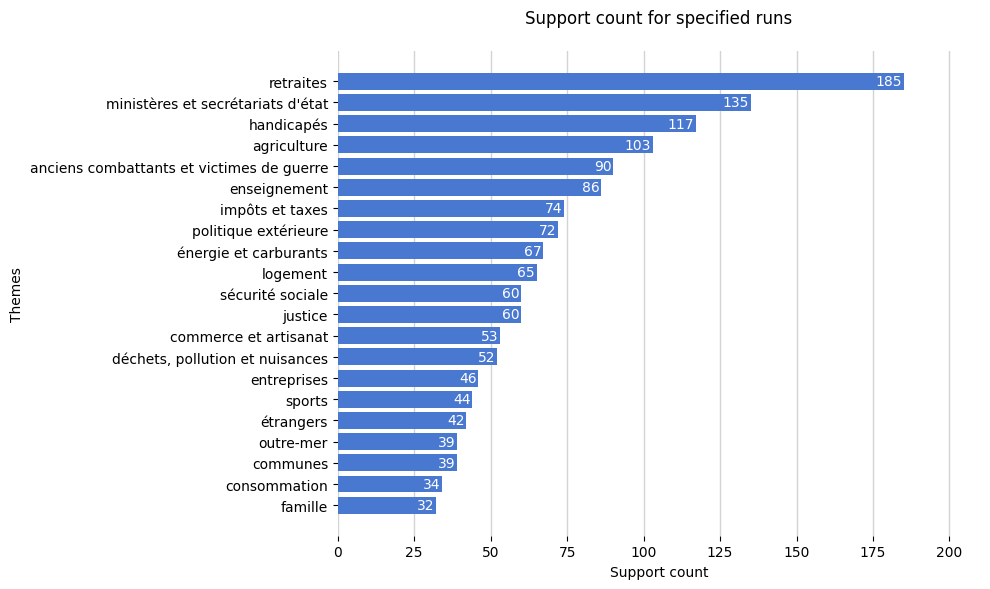

In [3]:
plot_support_counts(RUN_IDS, save_folder=OUTPUT_PATH)

Using this batch, we tried 2 different prompting strategy (all of them in french) :
- Zero-Shot Vanilla
- Zero-Shot Proxy
- Zero-Shot CoT Vanilla
- Zero-Shot Verbalized Confidence
- Zero-Shot CoT Verbalized Confidence
- Zero-Shot Self-Calibration
- Zero-Shot CoT Self-Calibration
- One-Shot Vanilla
- One-Shot Proxy
- Few-Shot (k=5) Vanilla
- Few-Shot (k=5) Proxy
- Few-Shot (k=5) CoT Vanilla
- Few-Shot (k=5) CoT Proxy

We only used one temperature setup for this run :
- 0.0

The following is the analysis for each prompting strategy used for experience #6. In that experiment, we mainly focus on how "collectivités locales" vs. "collectivités territoriales" are labeled properly and which confidence levels are registered on that task.

Our hypothesis is that contemporary categories ("collectivités territoriales") should have higher performance score than native ones ("collectivités locales").


## Zero-Shot Vanilla

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



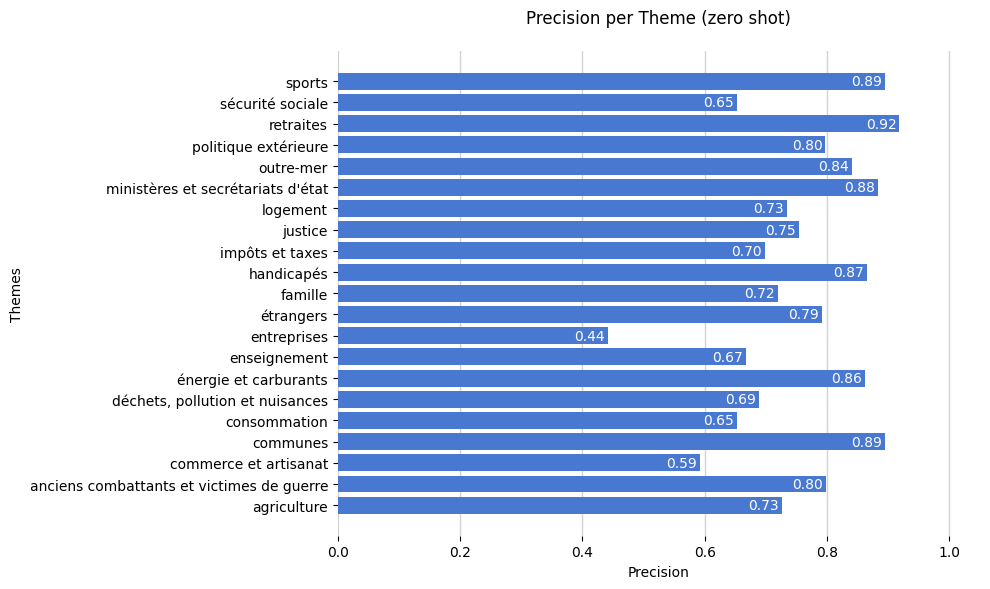

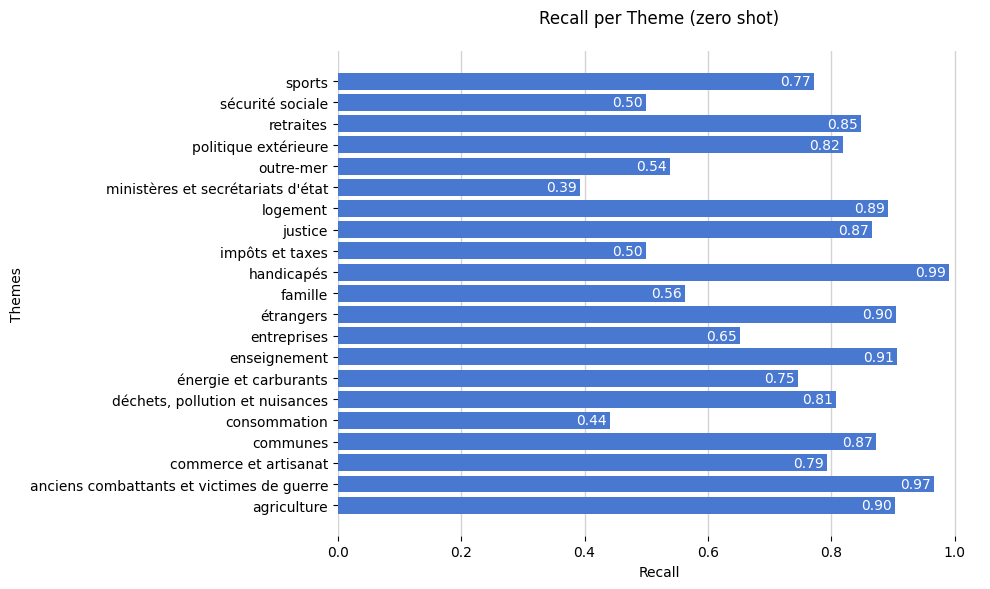

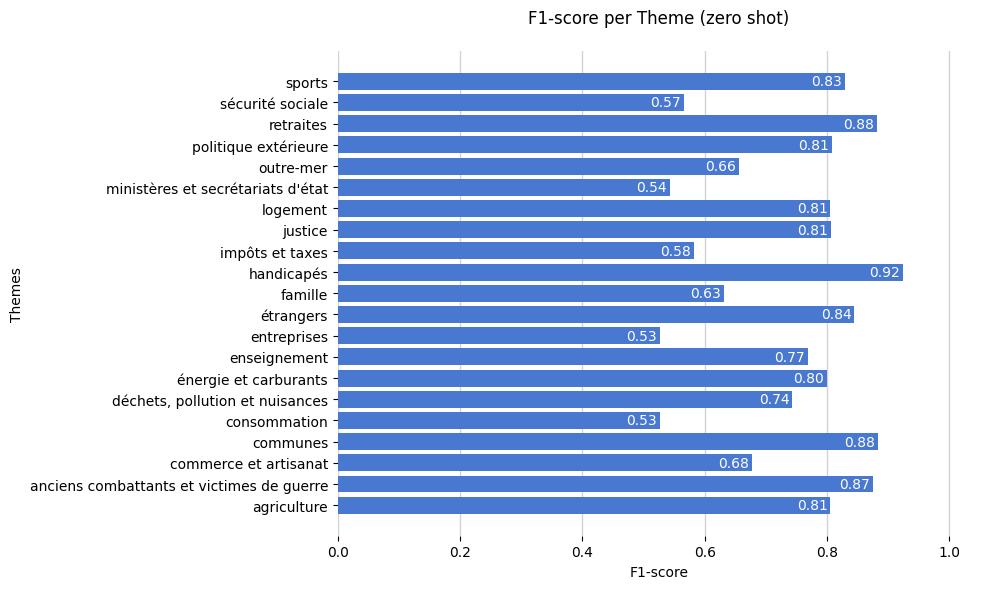

In [6]:
print_prompts(RUN_INFOS[0]["prompts"])
plot_precision(RUN_IDS[0], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[0], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[0], save_folder=OUTPUT_PATH)

## Zero-Shot Proxy

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- A. retraites
- B. ministères et secrétariats d'état
- C. handicapés
- D. enseignement
- E. politique extérieure
- F. agriculture
- G. logement
- H. anciens combattants et victimes de guerre
- I. énergie et carburants
- J. impôts et taxes
- K. sécurité sociale
- L. justice
- M. entreprises
- N. outre-mer
- O. déchets, pollution et nuisances
- P. communes
- Q. commerce et artisanat
- R. sports
- S. consommation
- T. famille
- U. étrangers
Ta réponse ne doit contenir qu'une seule chose : la lettre associée au thème correspondant. Par exemple `A` pour `retraites` ou `B` pour `ministères et secrétariats d'état`.

user: {0}



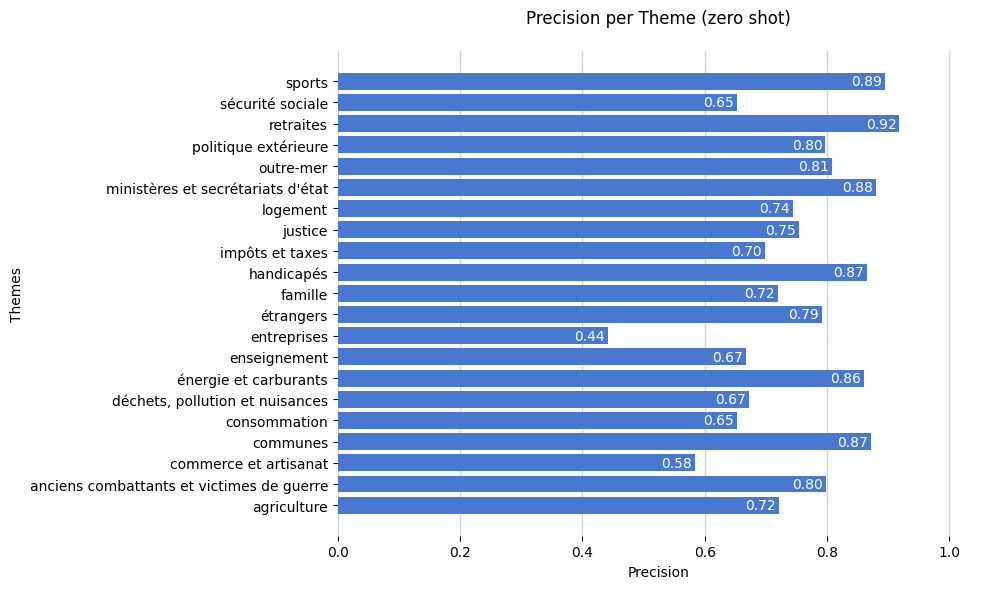

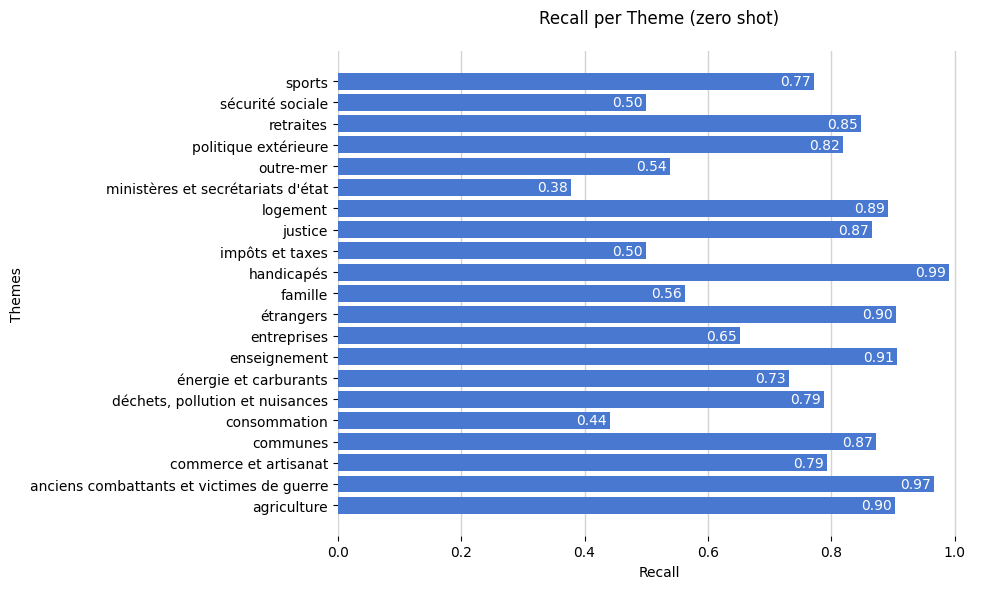

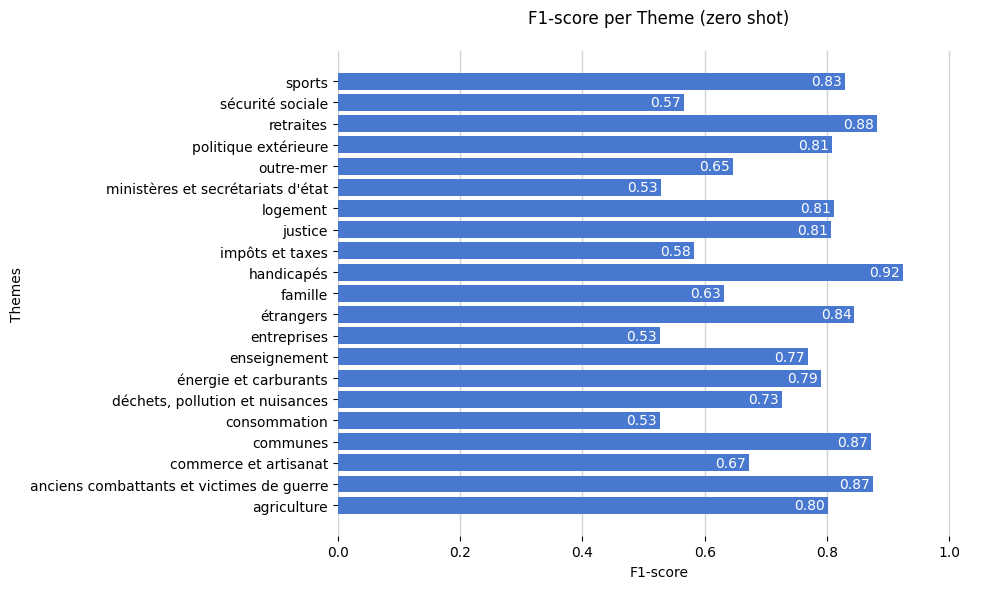

In [7]:
print_prompts(RUN_INFOS[1]["prompts"])
plot_precision(RUN_IDS[1], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[1], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[1], save_folder=OUTPUT_PATH)

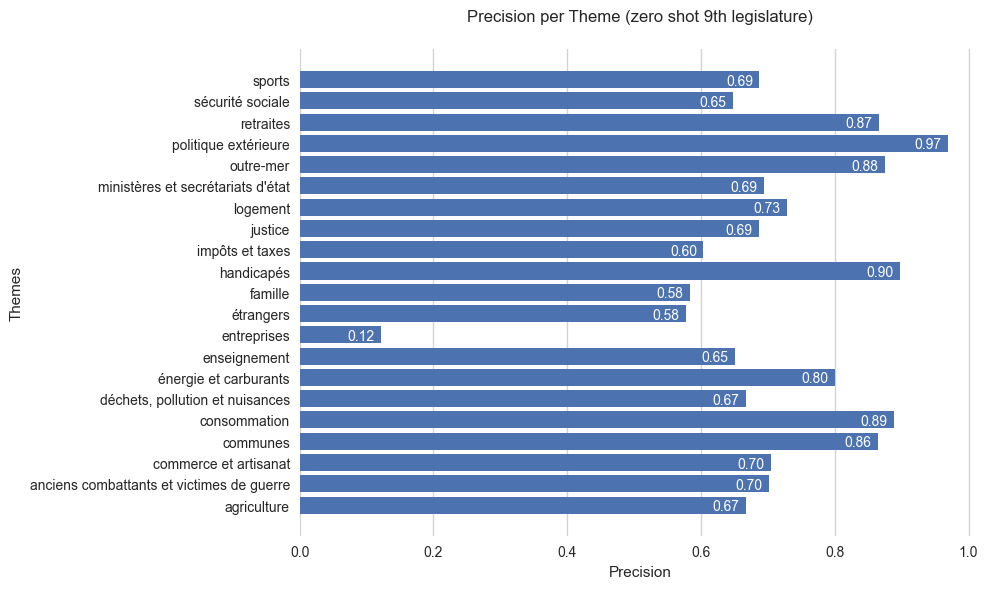

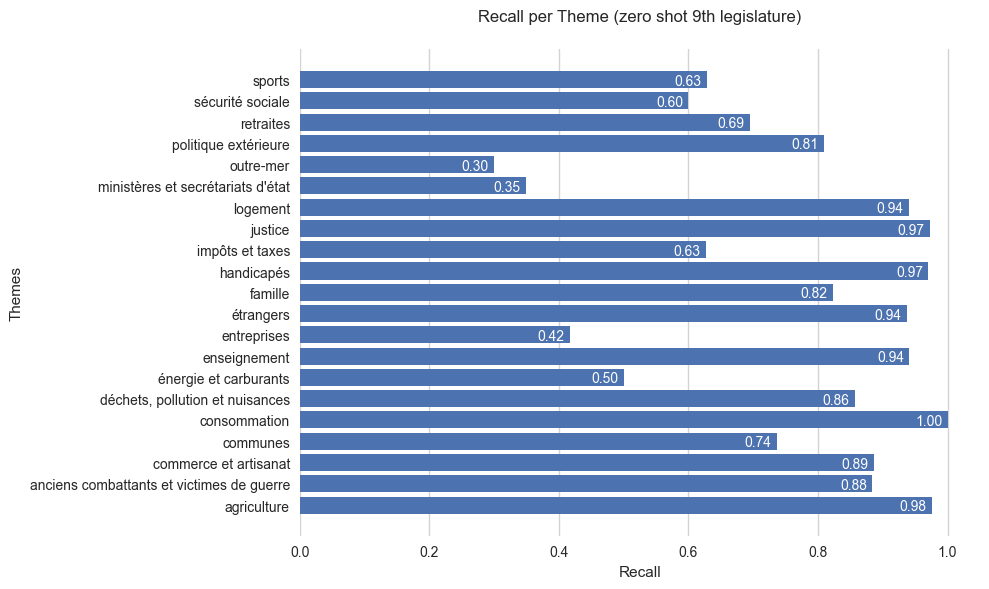

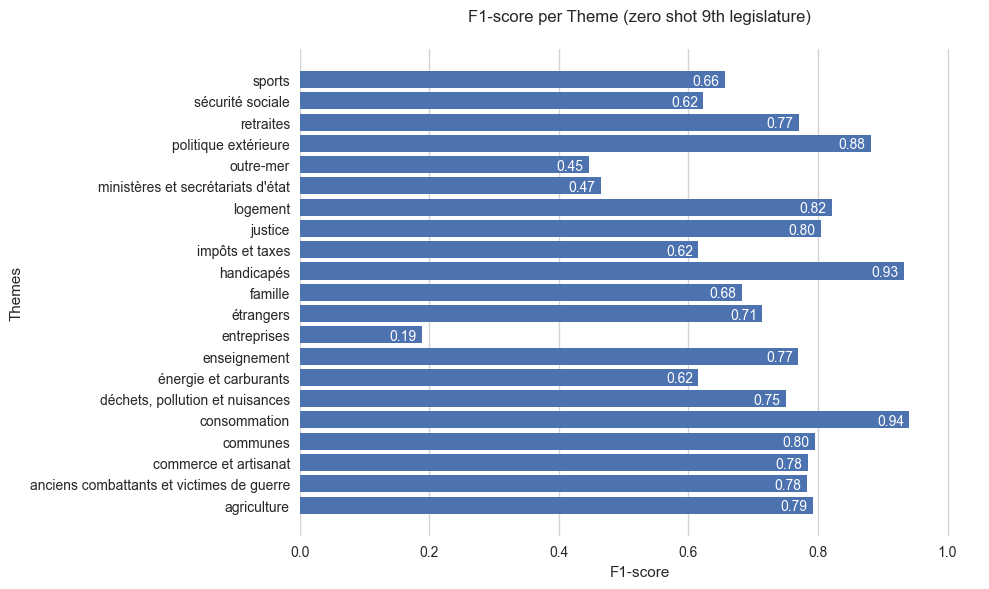

## Zero-Shot CoT Vanilla

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides. Réfléchis étape par étape.

user: {0}



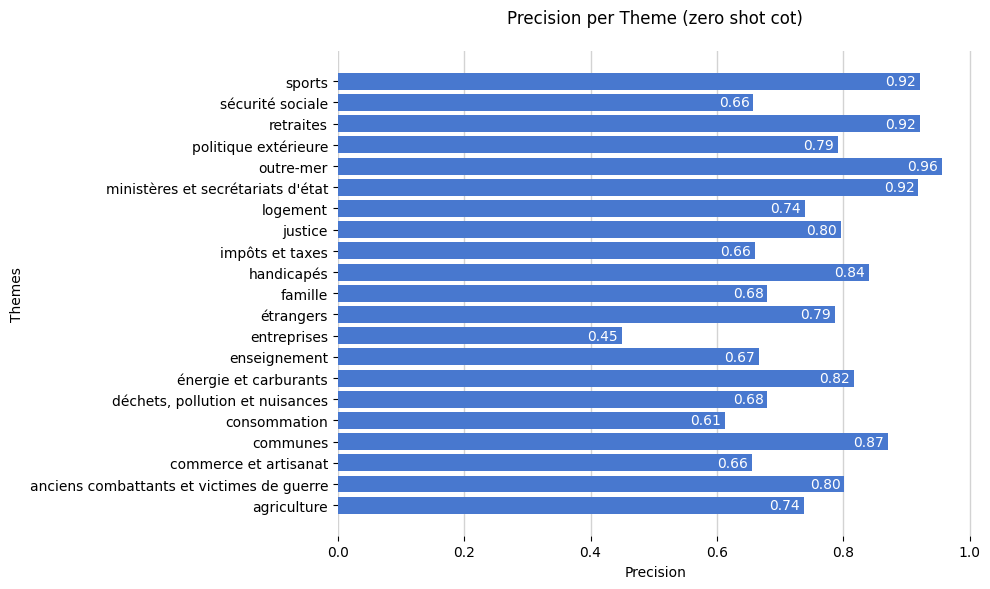

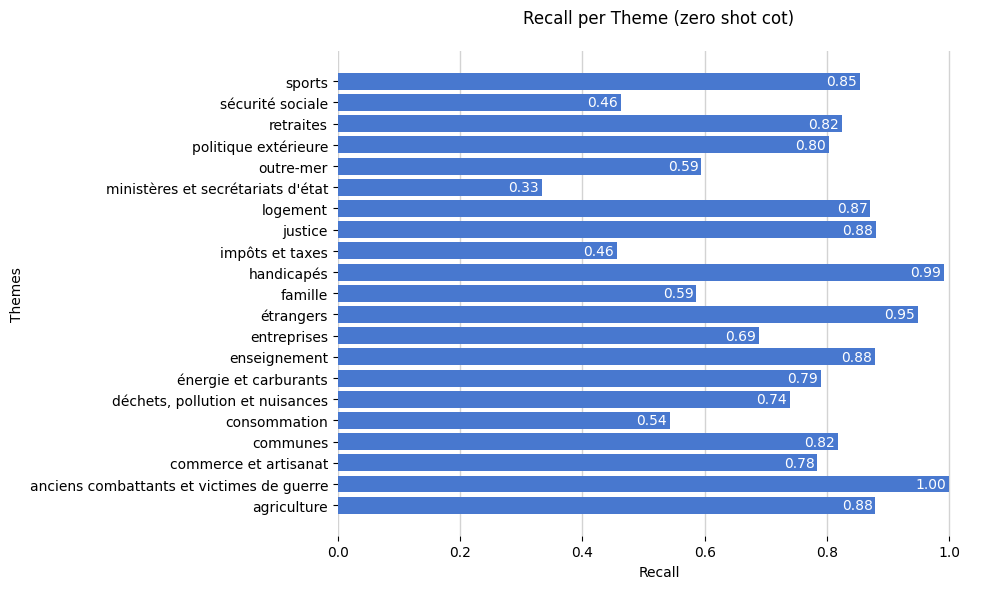

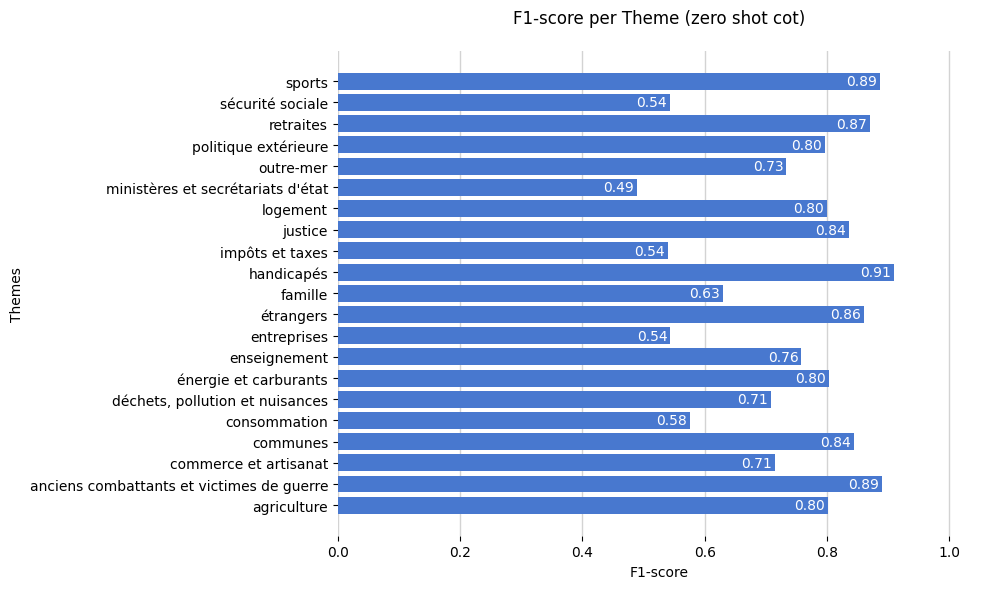

In [8]:
print_prompts(RUN_INFOS[2]["prompts"])
plot_precision(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[2], save_folder=OUTPUT_PATH)

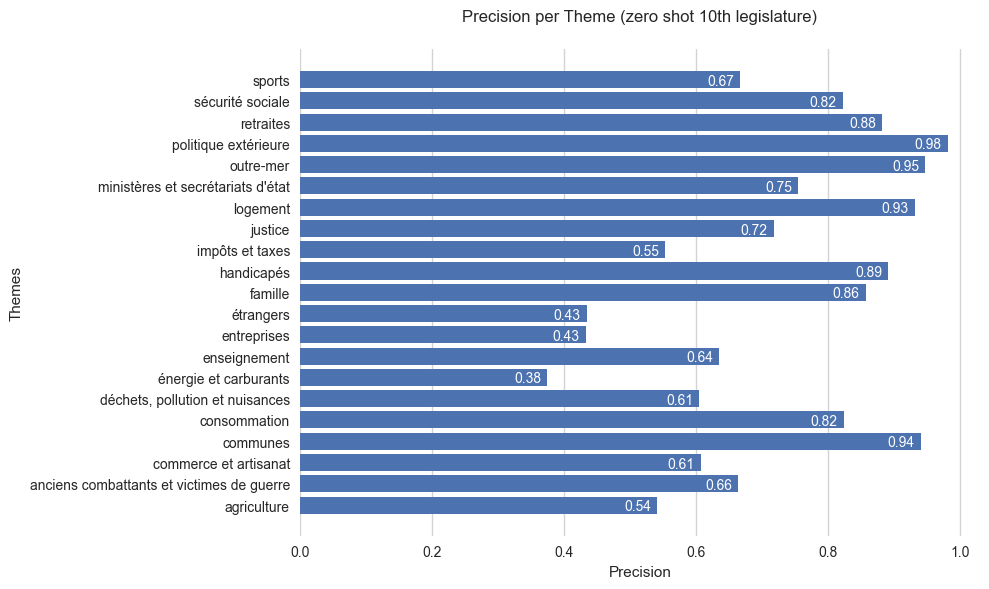

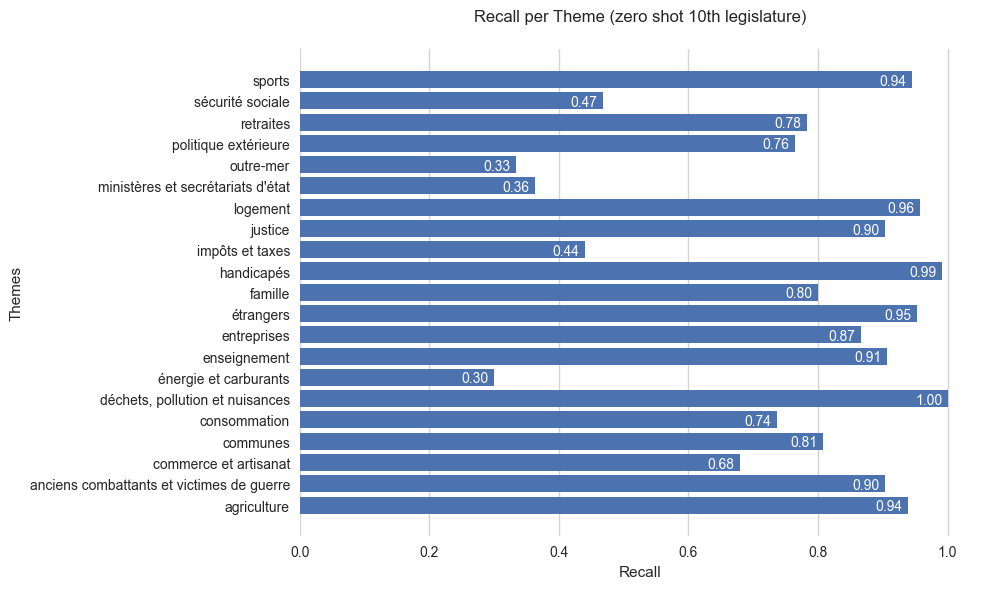

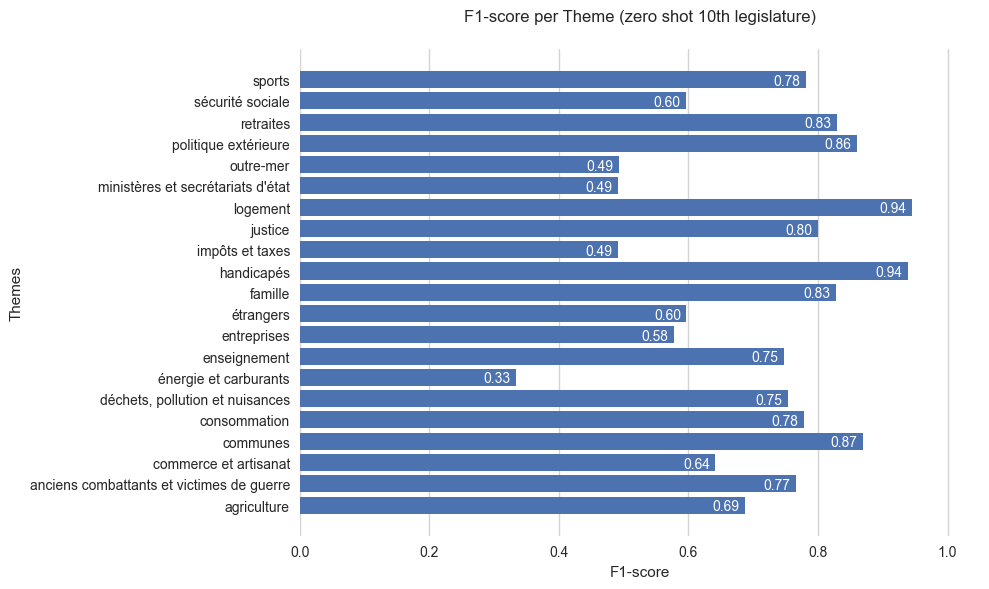

In [9]:
plot_precision(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[2], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[2], save_folder=OUTPUT_PATH)

## Zero-Shot CoT Proxy

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- A. retraites
- B. ministères et secrétariats d'état
- C. handicapés
- D. enseignement
- E. politique extérieure
- F. agriculture
- G. logement
- H. anciens combattants et victimes de guerre
- I. énergie et carburants
- J. impôts et taxes
- K. sécurité sociale
- L. justice
- M. entreprises
- N. outre-mer
- O. déchets, pollution et nuisances
- P. communes
- Q. commerce et artisanat
- R. sports
- S. consommation
- T. famille
- U. étrangers
Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides. Réfléchis étape par étape.

user: {0}



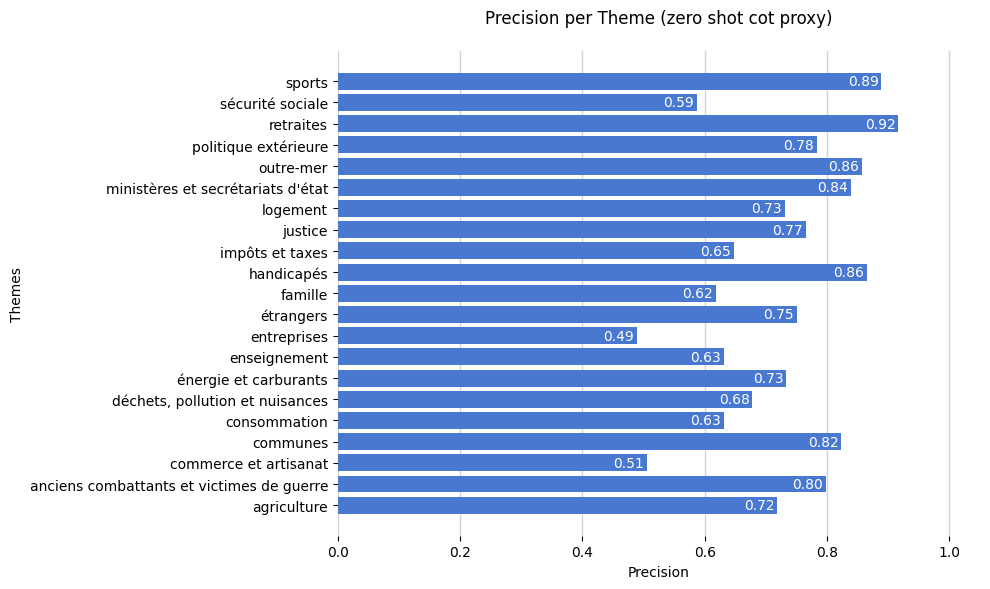

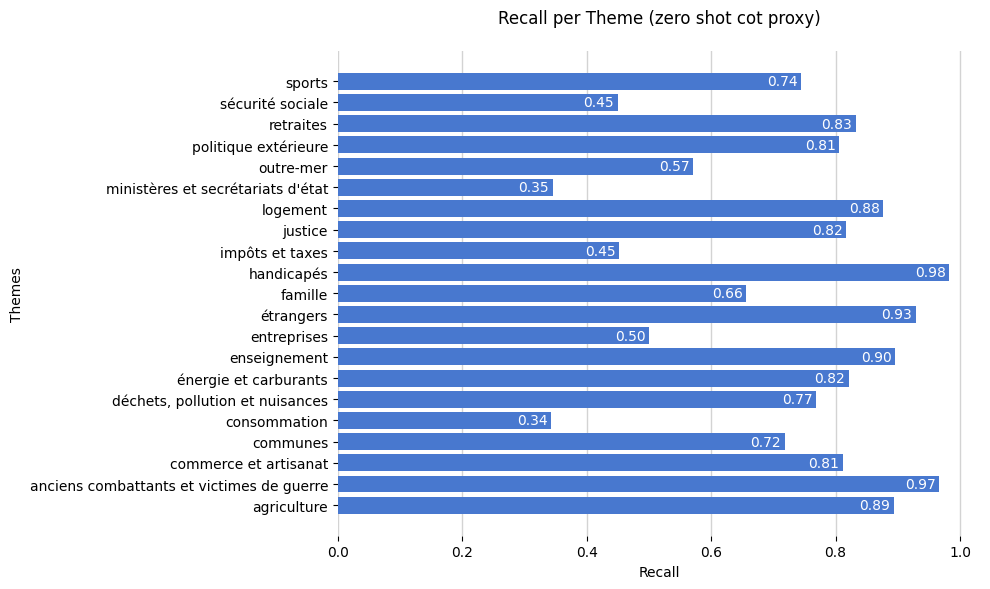

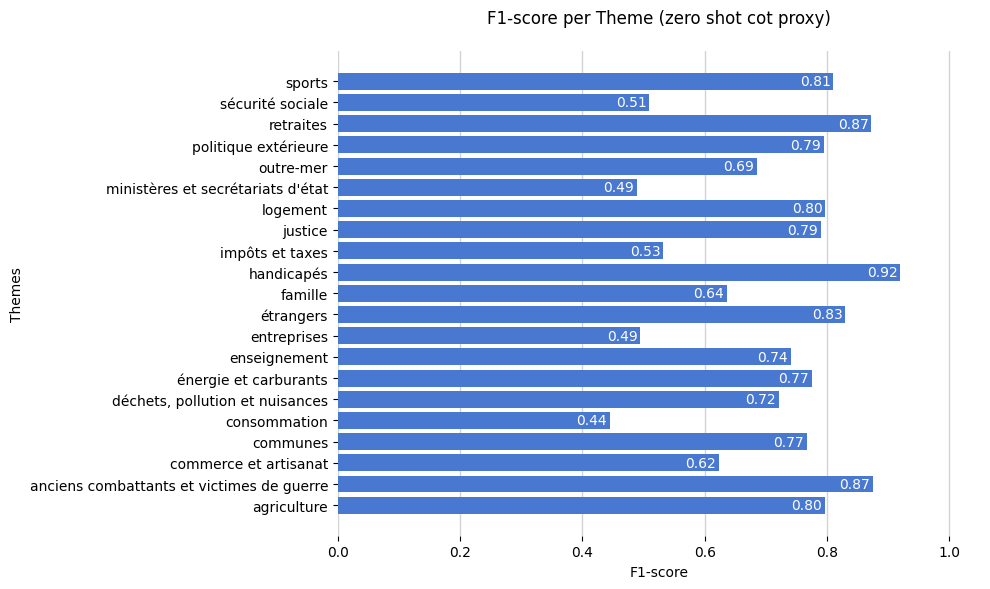

In [9]:
print_prompts(RUN_INFOS[3]["prompts"])
plot_precision(RUN_IDS[3], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[3], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[3], save_folder=OUTPUT_PATH)

## Zero-Shot Verbalized Confidence

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit deux choses :
- Le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.
- La probabilité que le thème choisi soit adéquat (entre 0.0 et 1.0)
Ne fournis que ces deux éléments, aucune autre explication ou mot complémentaire.
Par exemple: 

Thème: <le thème le plus adéquat pour annoter la question choisi par

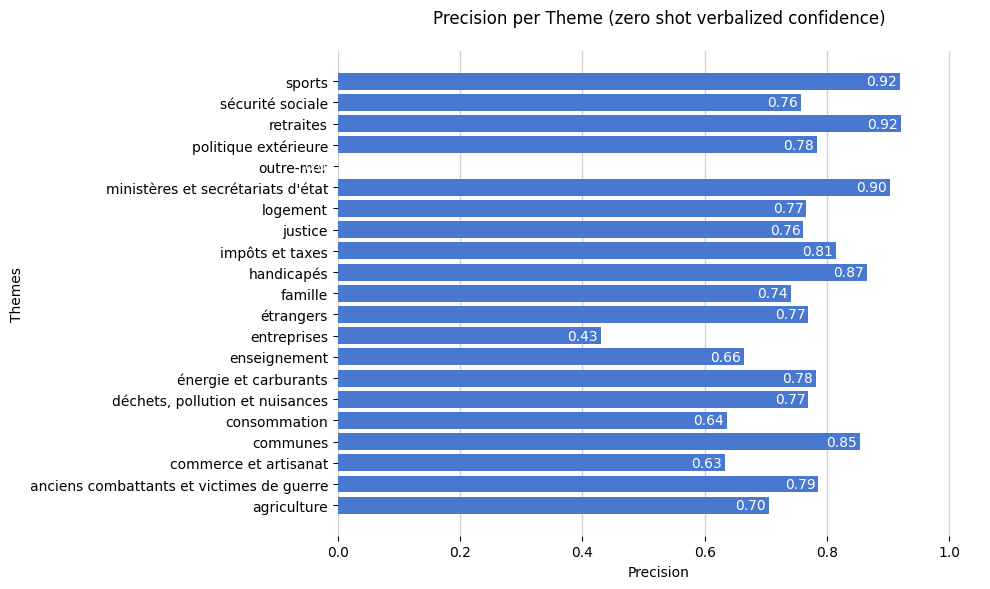

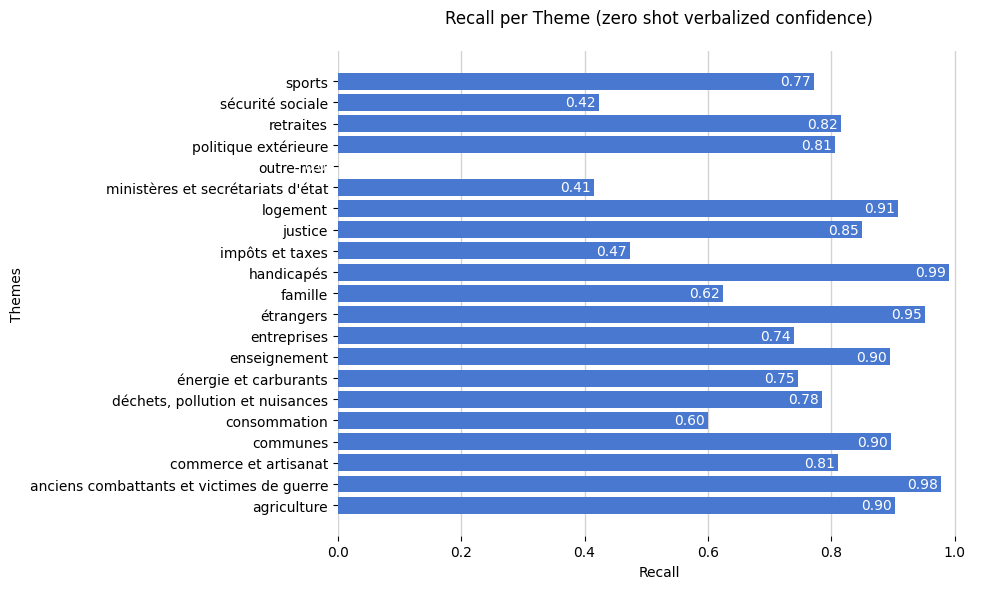

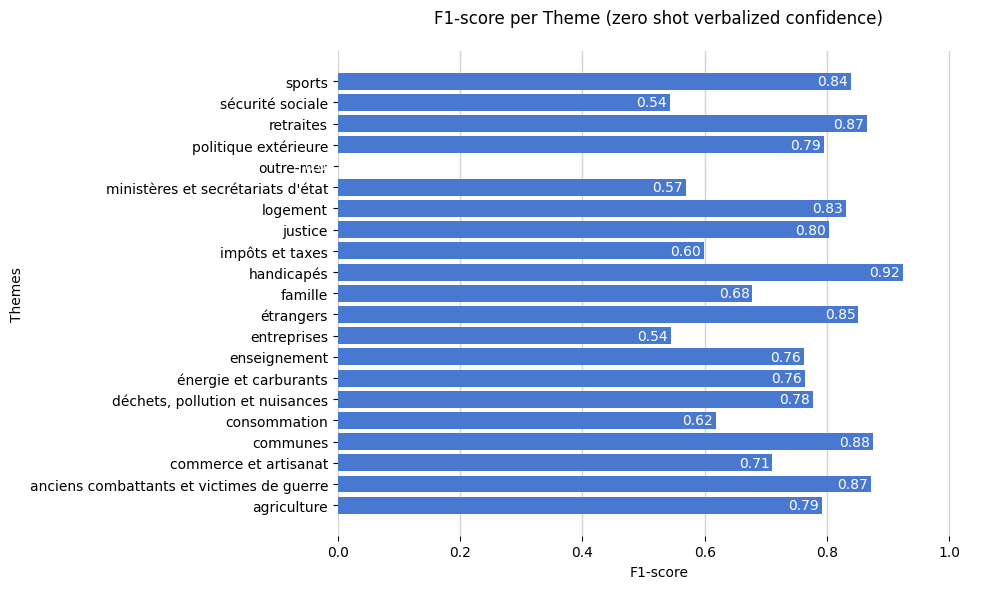

In [10]:
print_prompts(RUN_INFOS[4]["prompts"])
plot_precision(RUN_IDS[4], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[4], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[4], save_folder=OUTPUT_PATH)

## Zero-Shot CoT Verbalized Confidence

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit trois choses :
- Une explication guidant le choix du thème.
- Le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.
- La probabilité que le thème choisi soit adéquat (entre 0.0 et 1.0)
Réfléchis étape par étape. Ne fournis que ces trois éléments.
Par exemple: 

Explication: <explication guidant le choix

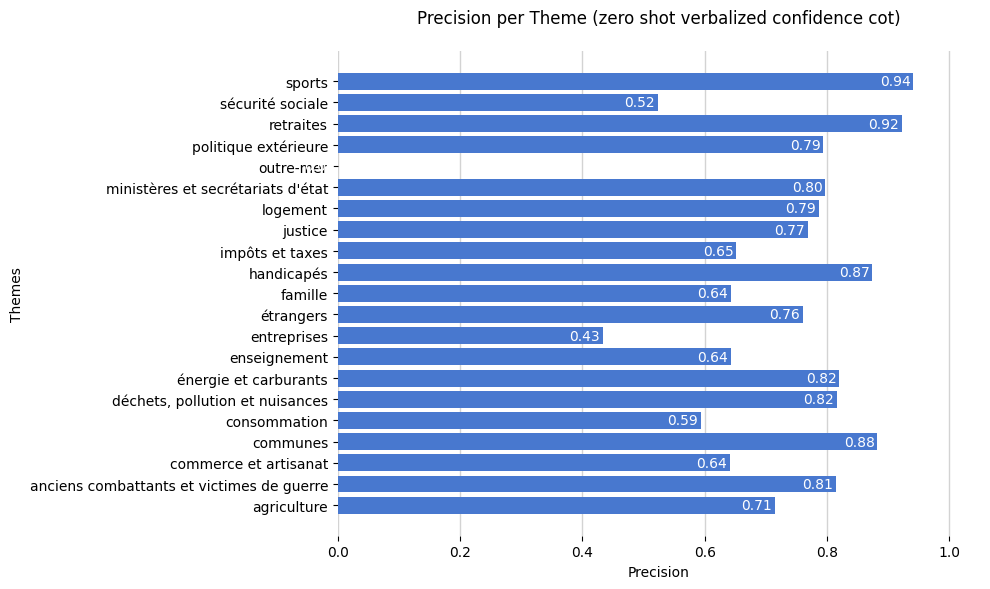

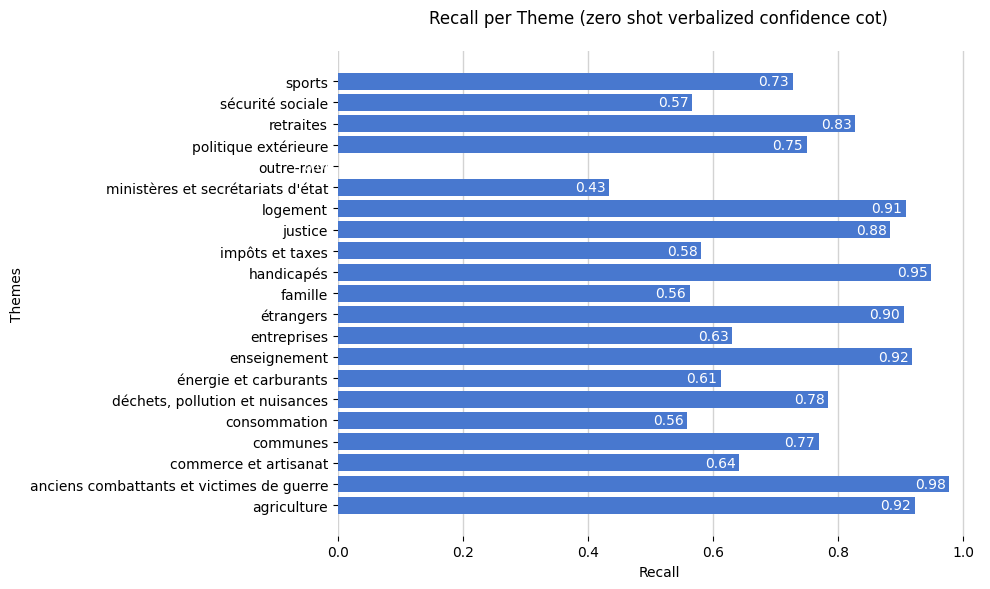

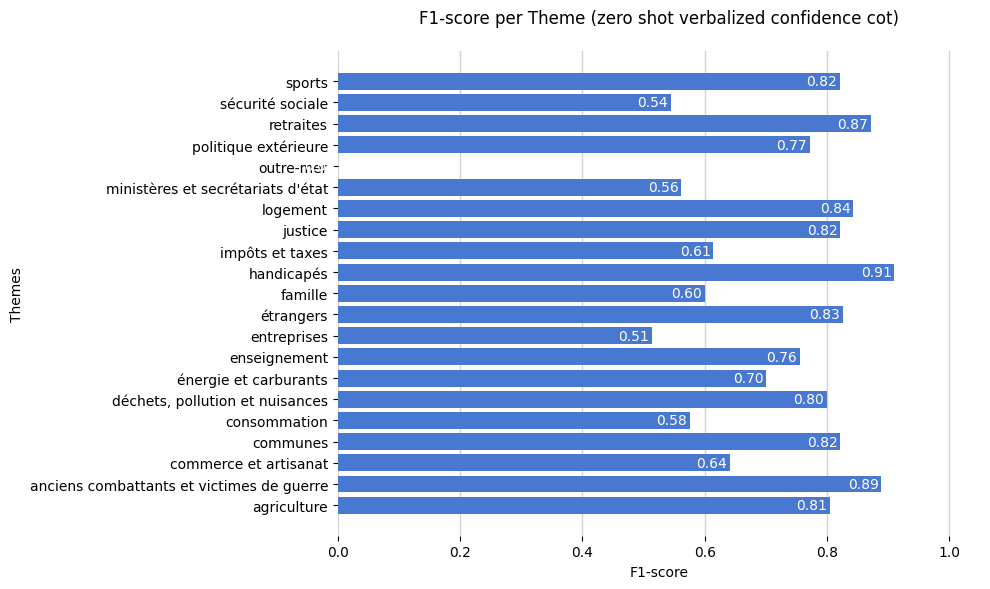

In [11]:
print_prompts(RUN_INFOS[5]["prompts"])
plot_precision(RUN_IDS[5], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[5], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[5], save_folder=OUTPUT_PATH)

## Zero-Shot Self-Calibration

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



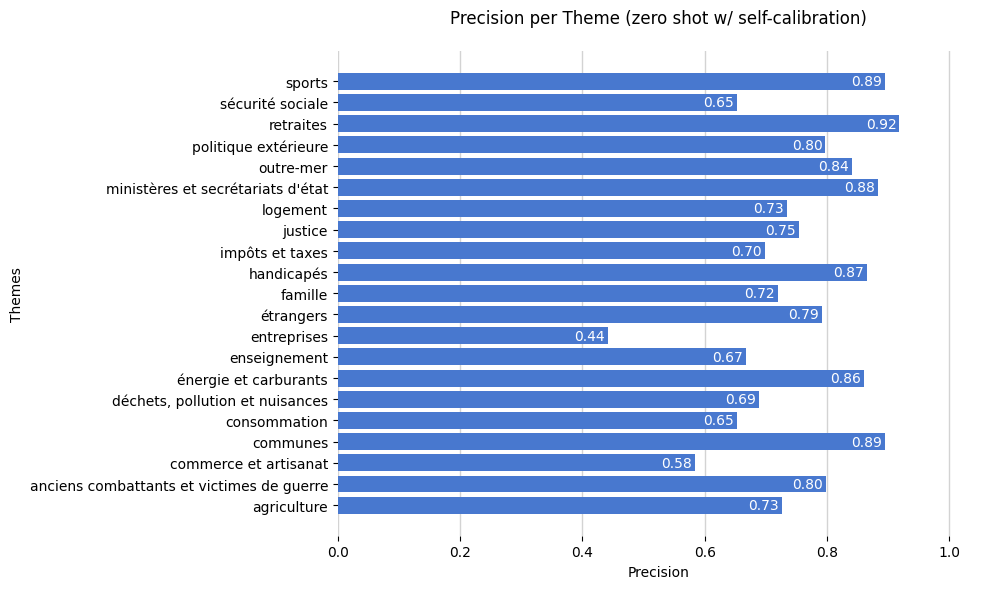

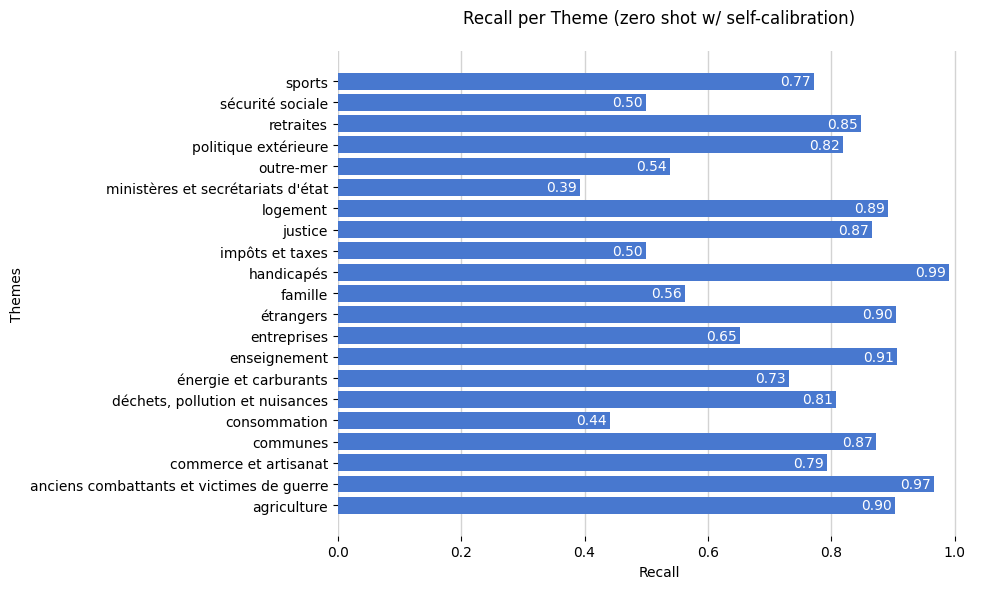

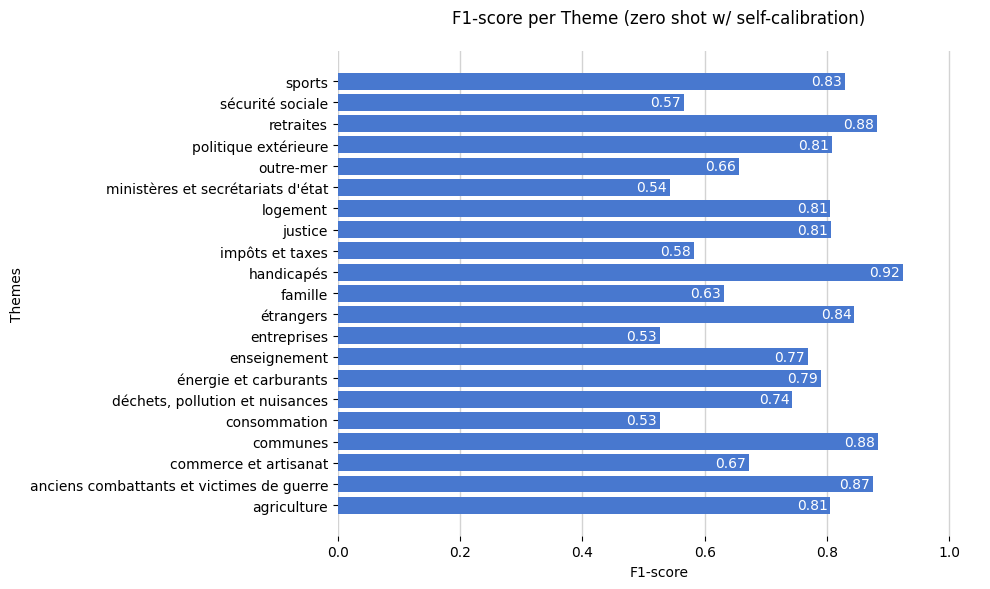

In [12]:
print_prompts(RUN_INFOS[6]["prompts"])
plot_precision(RUN_IDS[6], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[6], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[6], save_folder=OUTPUT_PATH)

## Zero-Shot CoT Self-Calibration

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides. Réfléchis étape par étape.

user: {0}



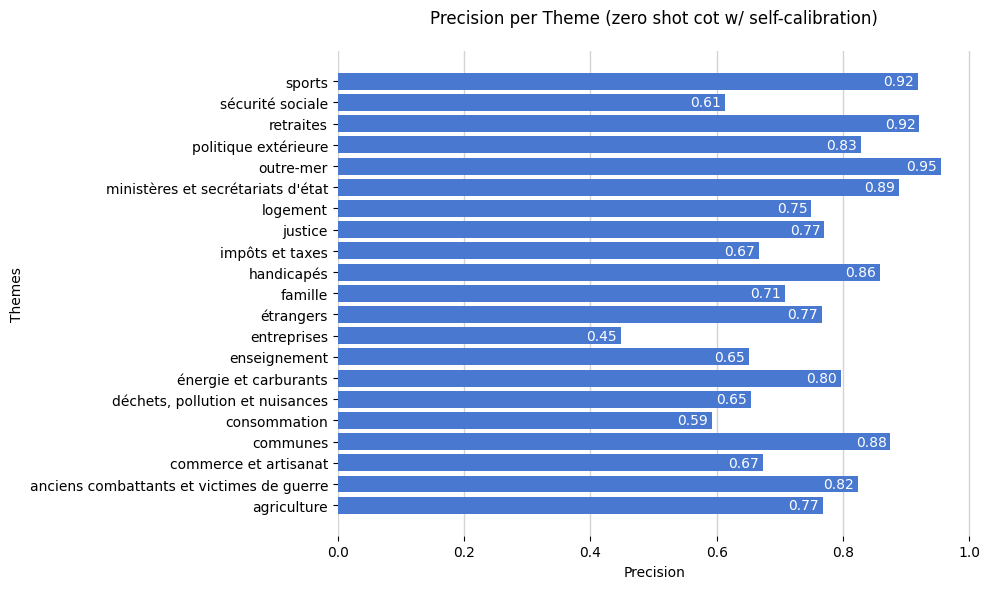

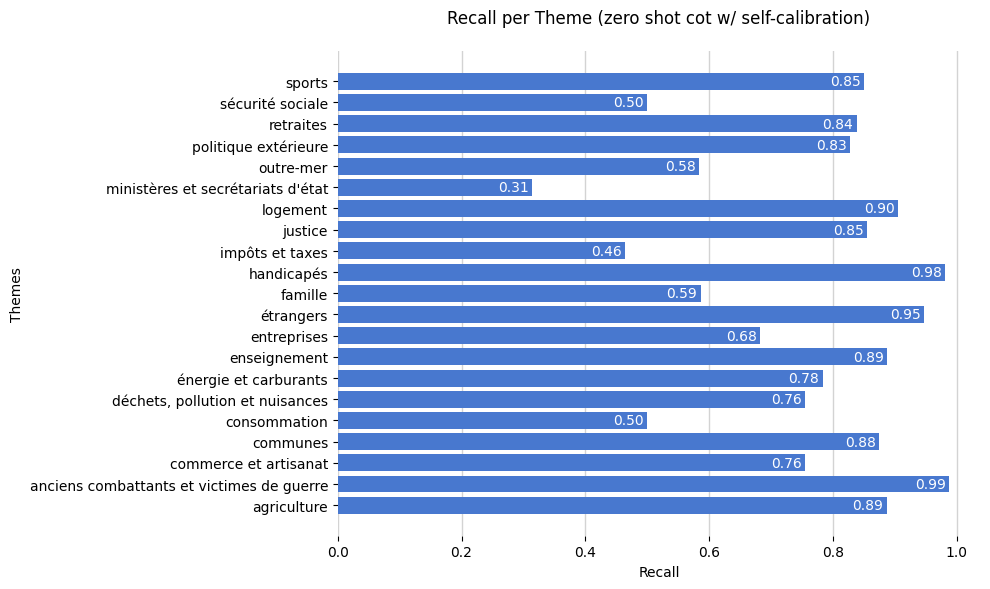

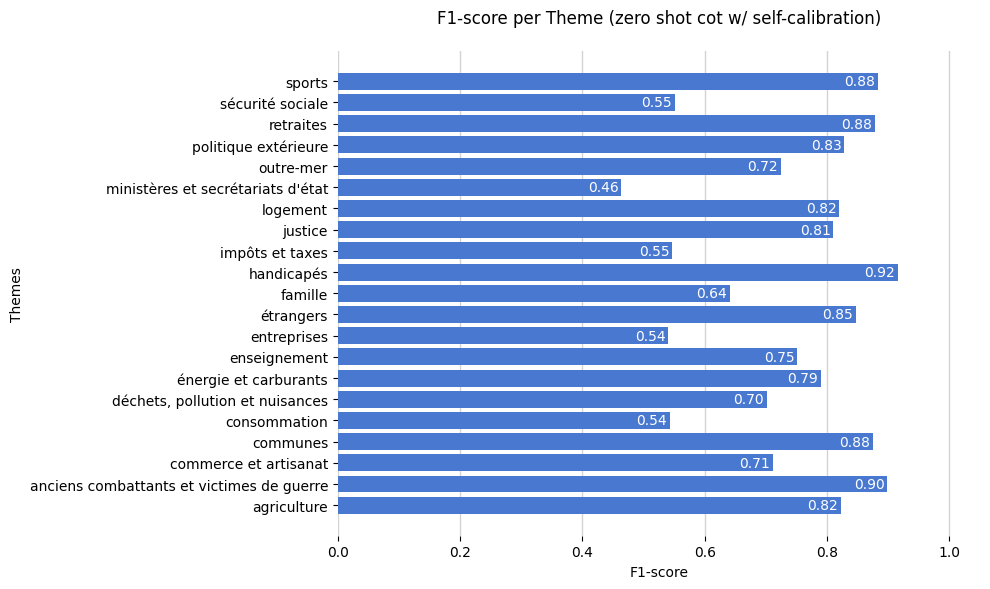

In [13]:
print_prompts(RUN_INFOS[7]["prompts"])
plot_precision(RUN_IDS[7], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[7], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[7], save_folder=OUTPUT_PATH)

## One-Shot Vanilla

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: 
M. Philippe Gosselin appelle l'attention de M. le ministre de l'économie, des finances et du commerce extérieur sur les inquiétudes des agences locales de maîtrise de l'énergie quant à une éventuelle modification du 

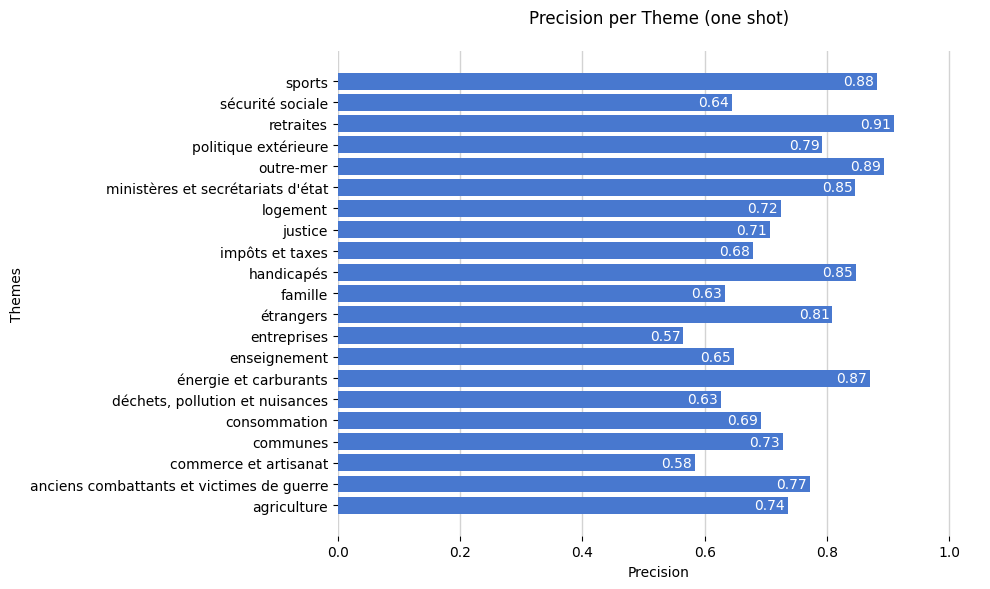

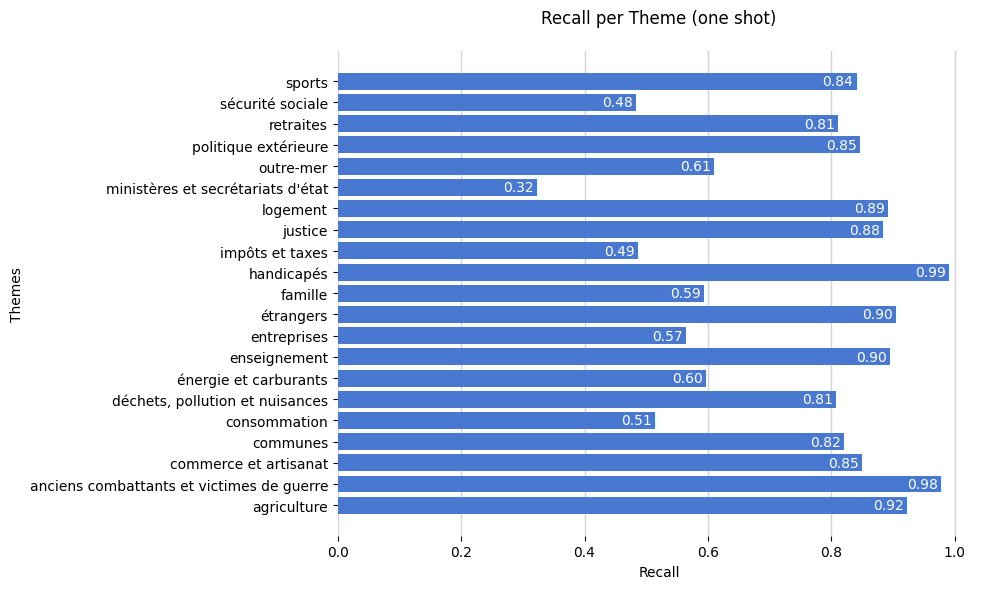

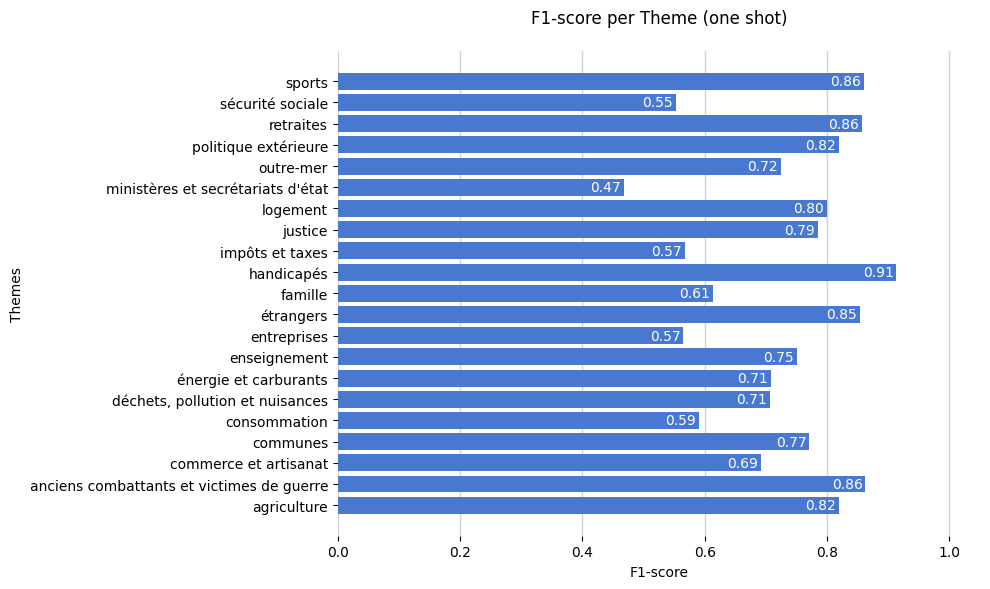

In [14]:
print_prompts(RUN_INFOS[8]["prompts"])
plot_precision(RUN_IDS[8], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[8], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[8], save_folder=OUTPUT_PATH)

## One-Shot Proxy

system: Agis comme un assistant de recherche chargé d'annoter des documents. Ton rôle est d'attribuer un label sous la forme d'une lettre à une question posée par un député à l'Assemblée nationale française. Chaque thème est associé à une lettre de A à U. La liste des thèmes est la suivante :
- A. retraites
- B. ministères et secrétariats d'état
- C. handicapés
- D. enseignement
- E. politique extérieure
- F. agriculture
- G. logement
- H. anciens combattants et victimes de guerre
- I. énergie et carburants
- J. impôts et taxes
- K. sécurité sociale
- L. justice
- M. entreprises
- N. outre-mer
- O. déchets, pollution et nuisances
- P. communes
- Q. commerce et artisanat
- R. sports
- S. consommation
- T. famille
- U. étrangers
Ta réponse ne doit contenir qu'une seule chose : la lettre associée au thème correspondant. Par exemple `A` pour `retraites` ou `B` pour `ministères et secrétariats d'état`.

user: 
M. Gérard Charasse attire l'attention de Mme la ministre des affaires sociales et

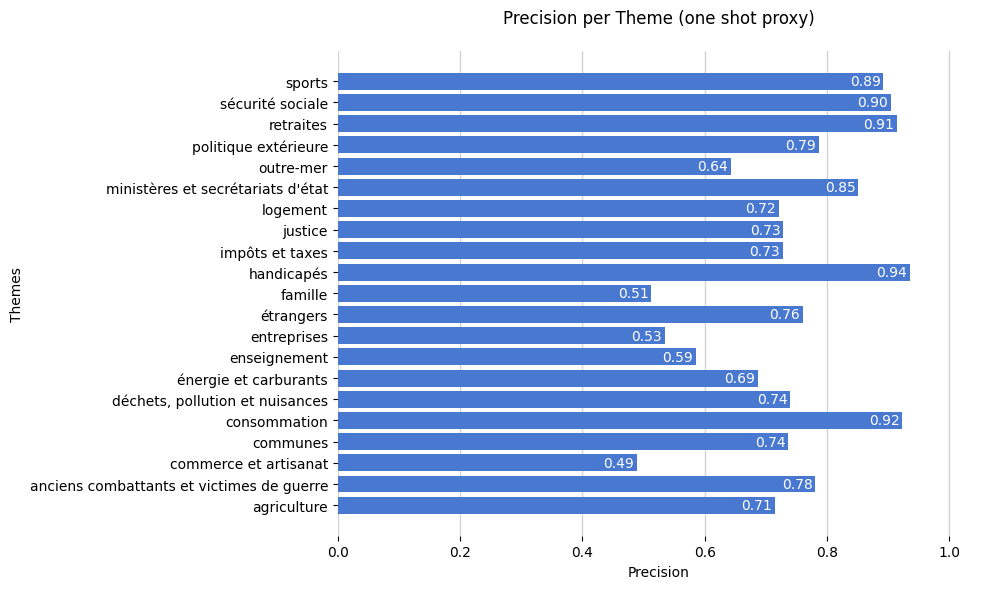

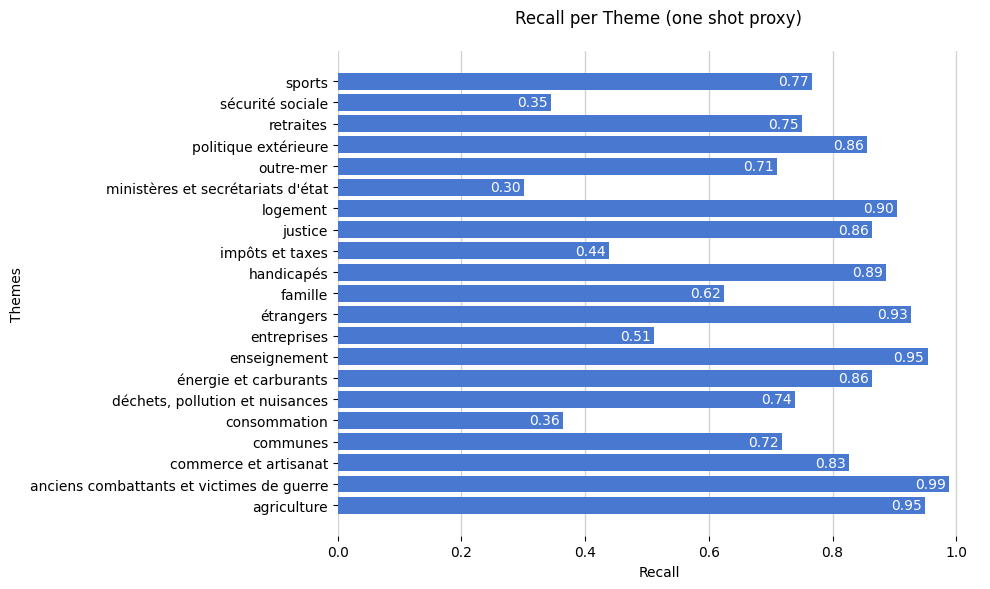

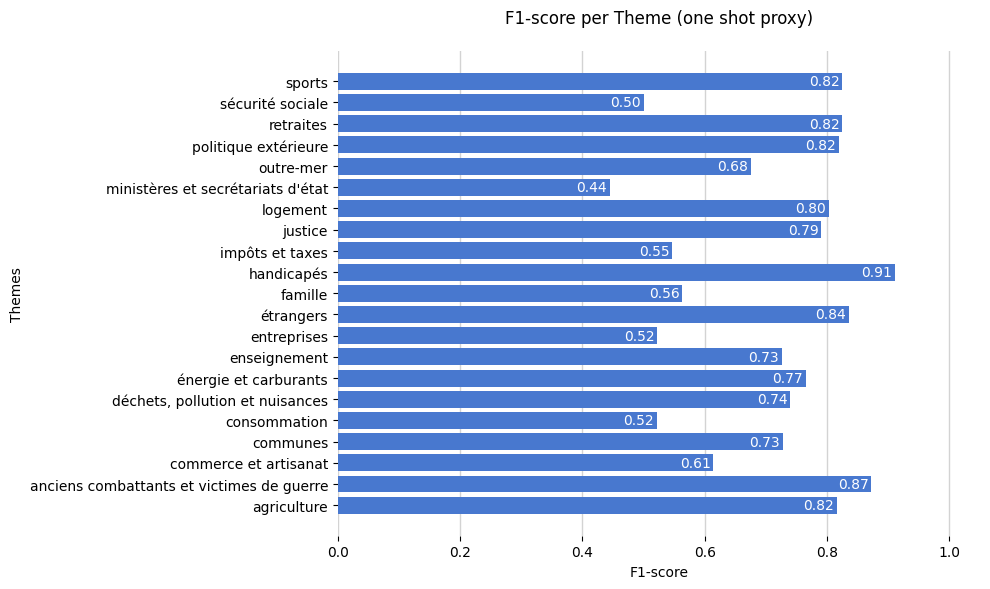

In [15]:
print_prompts(RUN_INFOS[9]["prompts"])
plot_precision(RUN_IDS[9], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[9], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[9], save_folder=OUTPUT_PATH)

## Few-Shot (k=5) Vanilla

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: 
M. Éric Raoult attire l'attention de M. le ministre de l'intérieur sur le recensement des limogeages de préfets de police sous la Ve République. En effet, la récente décision concernant le préfet Michel Gaudin appara

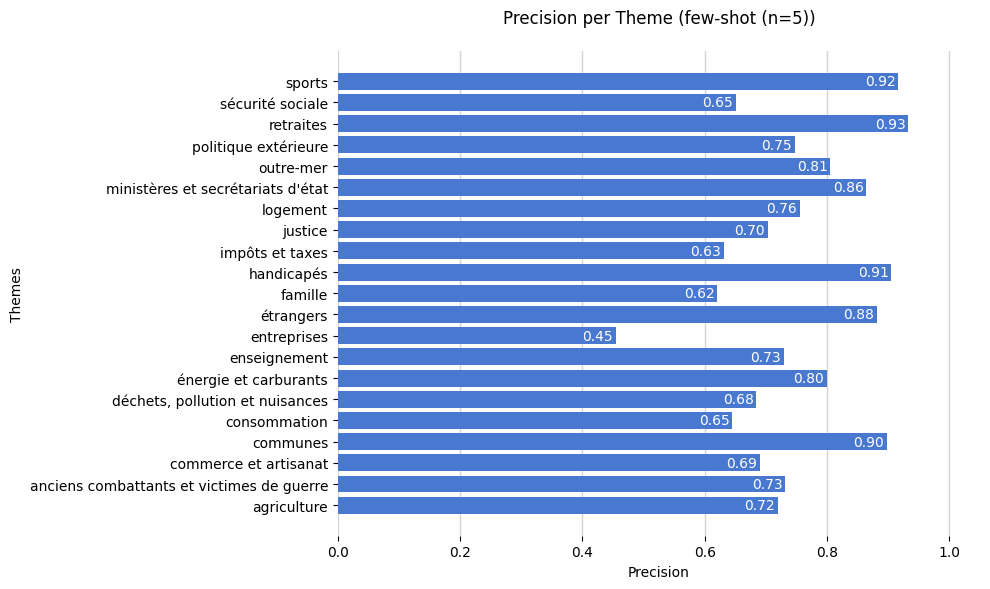

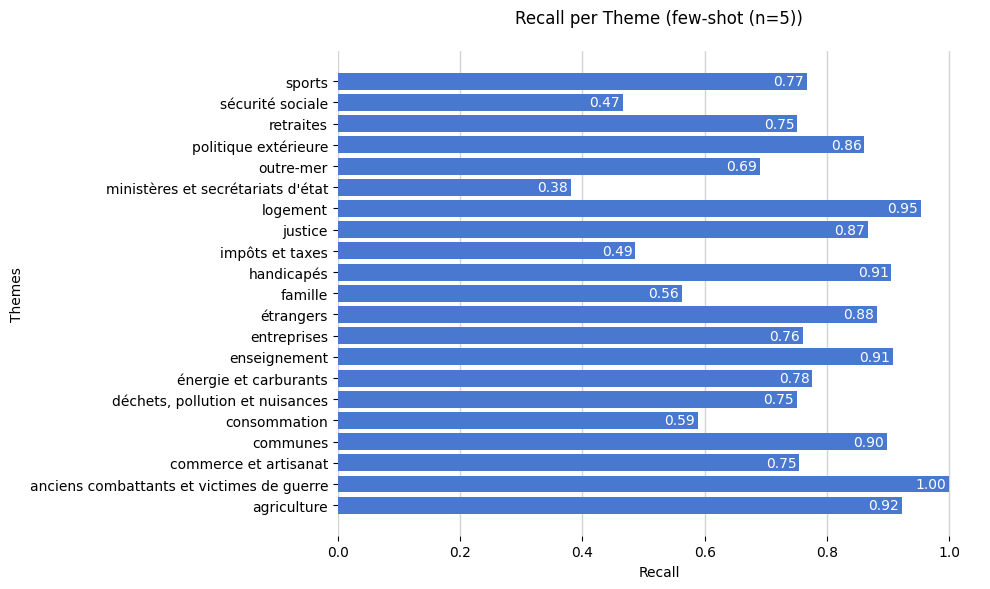

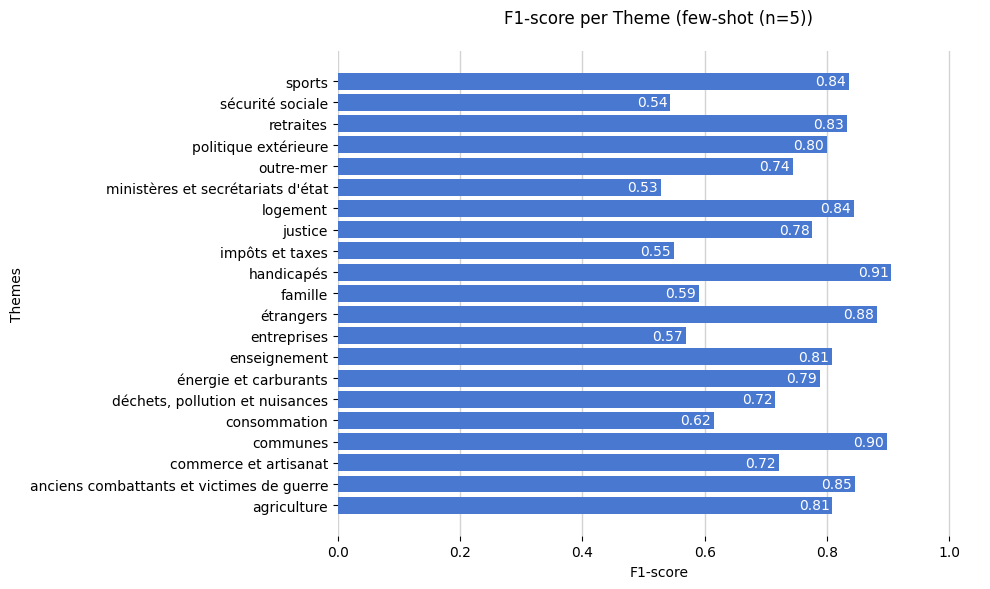

In [16]:
print_prompts(RUN_INFOS[10]["prompts"])
plot_precision(RUN_IDS[10], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[10], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[10], save_folder=OUTPUT_PATH)

## Few-Shot (k=5) Proxy

system: Agis comme un assistant de recherche chargé d'annoter des documents. Ton rôle est d'attribuer un label sous la forme d'une lettre à une question posée par un député à l'Assemblée nationale française. Chaque thème est associé à une lettre de A à U. La liste des thèmes est la suivante :
- A. retraites
- B. ministères et secrétariats d'état
- C. handicapés
- D. enseignement
- E. politique extérieure
- F. agriculture
- G. logement
- H. anciens combattants et victimes de guerre
- I. énergie et carburants
- J. impôts et taxes
- K. sécurité sociale
- L. justice
- M. entreprises
- N. outre-mer
- O. déchets, pollution et nuisances
- P. communes
- Q. commerce et artisanat
- R. sports
- S. consommation
- T. famille
- U. étrangers
Ta réponse ne doit contenir qu'une seule chose : la lettre associée au thème correspondant. Par exemple `A` pour `retraites` ou `B` pour `ministères et secrétariats d'état`.

user: 
Mme Marianne Dubois attire l'attention de M. le ministre de l'économie, des finan

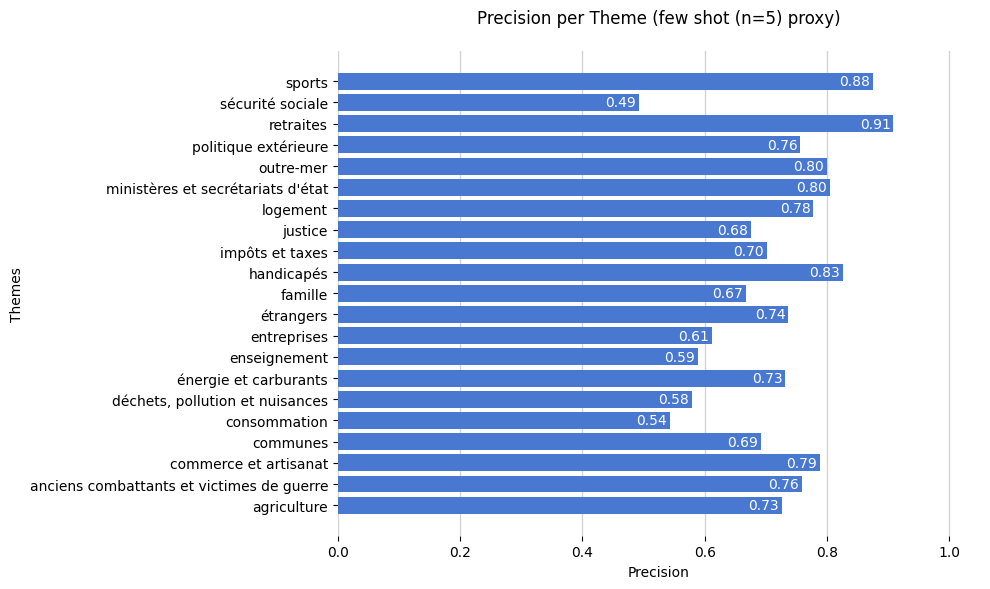

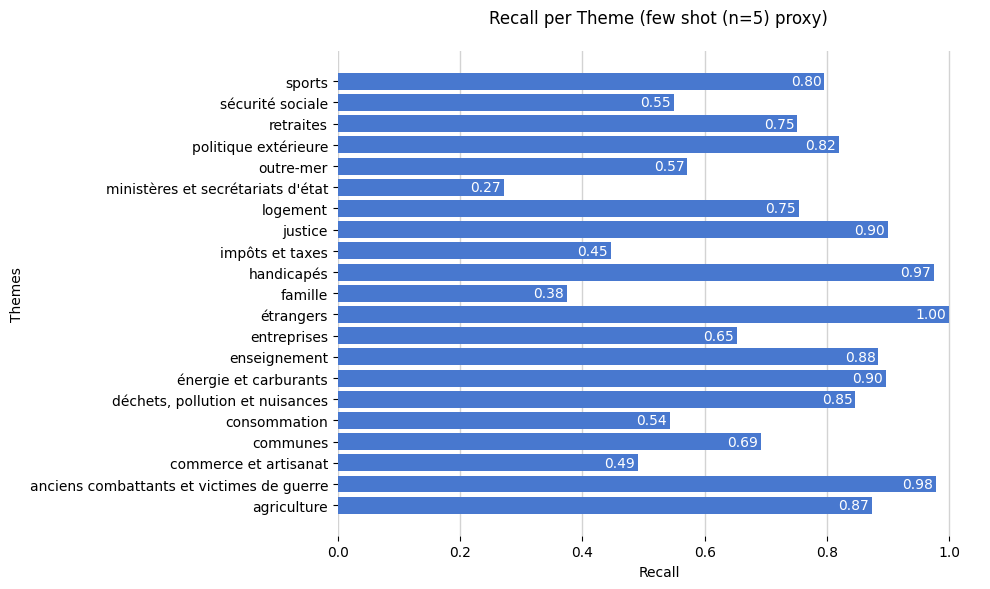

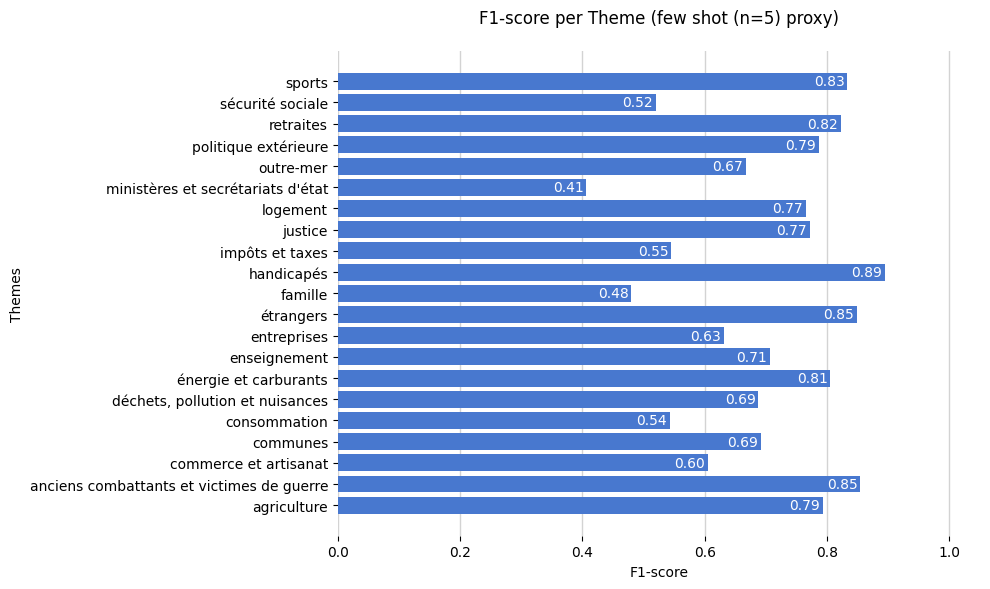

In [17]:
print_prompts(RUN_INFOS[11]["prompts"])
plot_precision(RUN_IDS[11], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[11], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[11], save_folder=OUTPUT_PATH)

## Few-Shot (k=5) CoT Vanilla

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides. Réfléchis étape par étape. Voici un exemple de réflexion :


user: 
Mme Martine Billard attire l'attention de M. le ministre de l'économie, des finances et de l'industrie sur l'avenir de l'administration des douanes dont la réorganisation est actuellement à l'étude. Le projet de la direction générale des douanes envisage présentement de supprimer la to

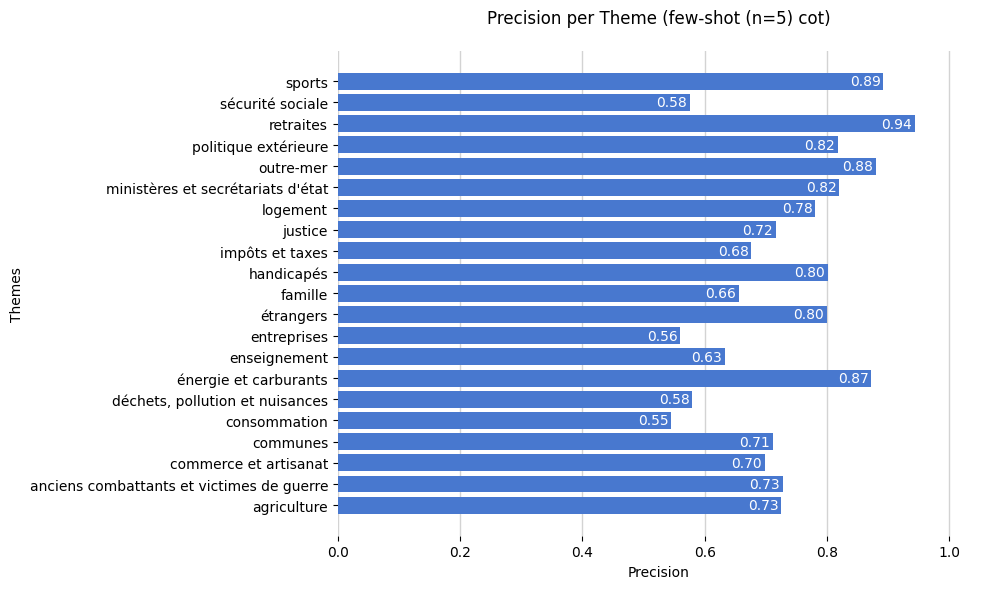

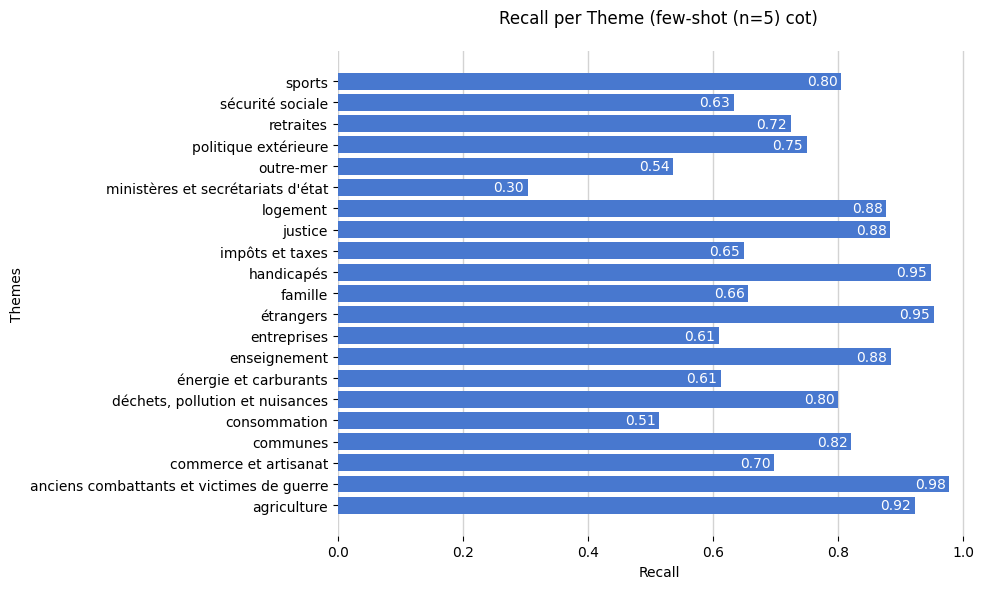

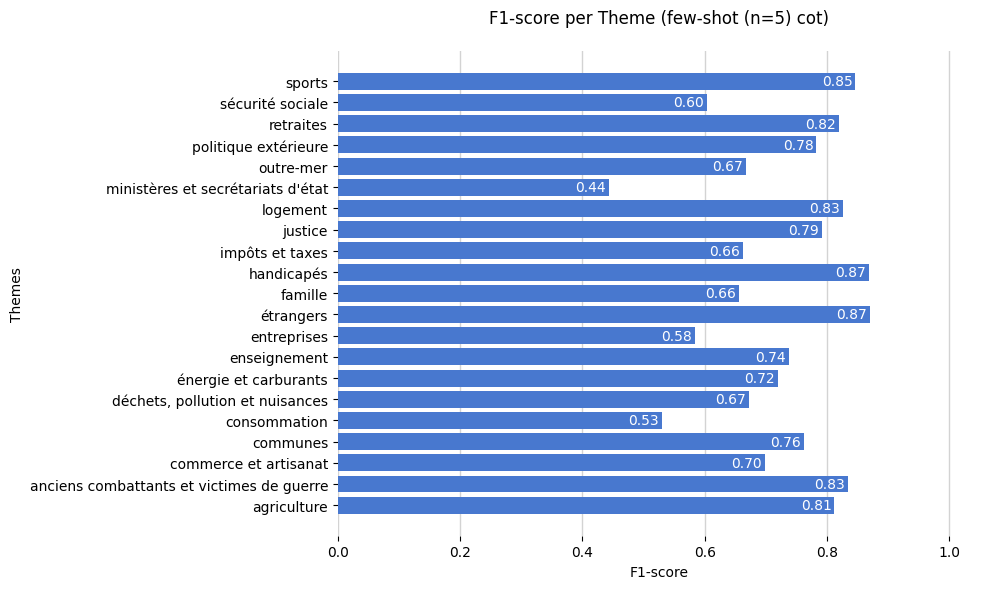

In [18]:
print_prompts(RUN_INFOS[12]["prompts"])
plot_precision(RUN_IDS[12], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[12], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[12], save_folder=OUTPUT_PATH)

### Few-Shot CoT Proxy

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- A. retraites
- B. ministères et secrétariats d'état
- C. handicapés
- D. enseignement
- E. politique extérieure
- F. agriculture
- G. logement
- H. anciens combattants et victimes de guerre
- I. énergie et carburants
- J. impôts et taxes
- K. sécurité sociale
- L. justice
- M. entreprises
- N. outre-mer
- O. déchets, pollution et nuisances
- P. communes
- Q. commerce et artisanat
- R. sports
- S. consommation
- T. famille
- U. étrangers
Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides. Réfléchis étape par étape. Voici un exemple de réflexion :


user: 
Mme Nathalie Kosciusko-Morizet appelle l'attention de M. le Premier ministre sur l'illettrisme en France. En effet, il semble qu'une personne sur dix éprouve des difficultés à écrire ou à lire. Selon une étude réalisée sur 

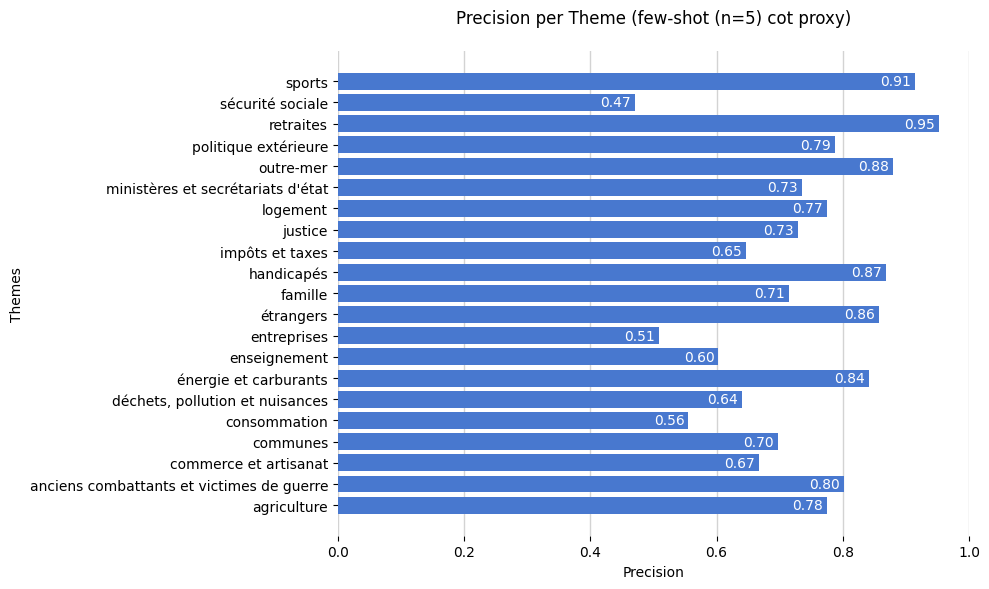

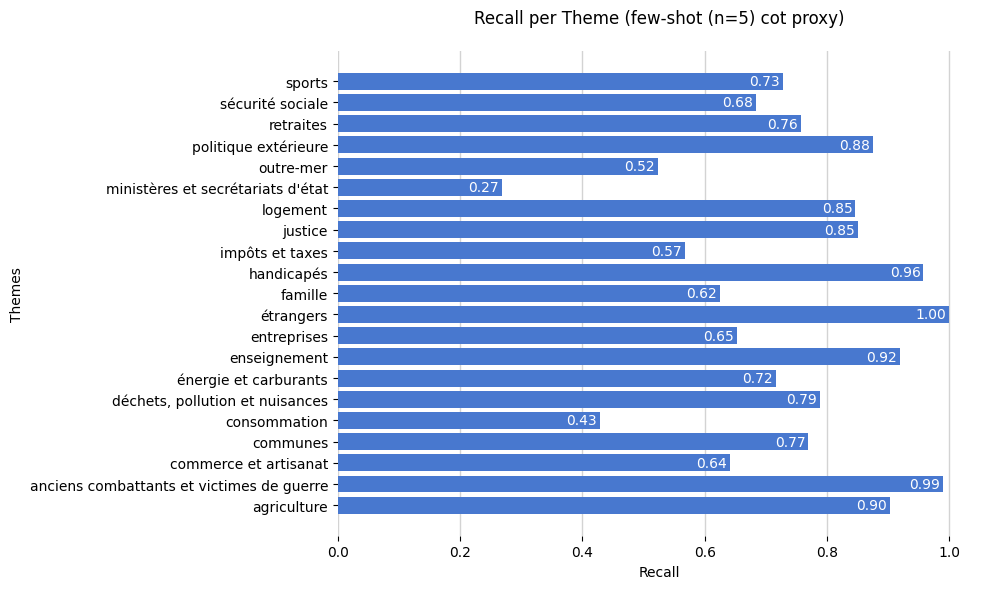

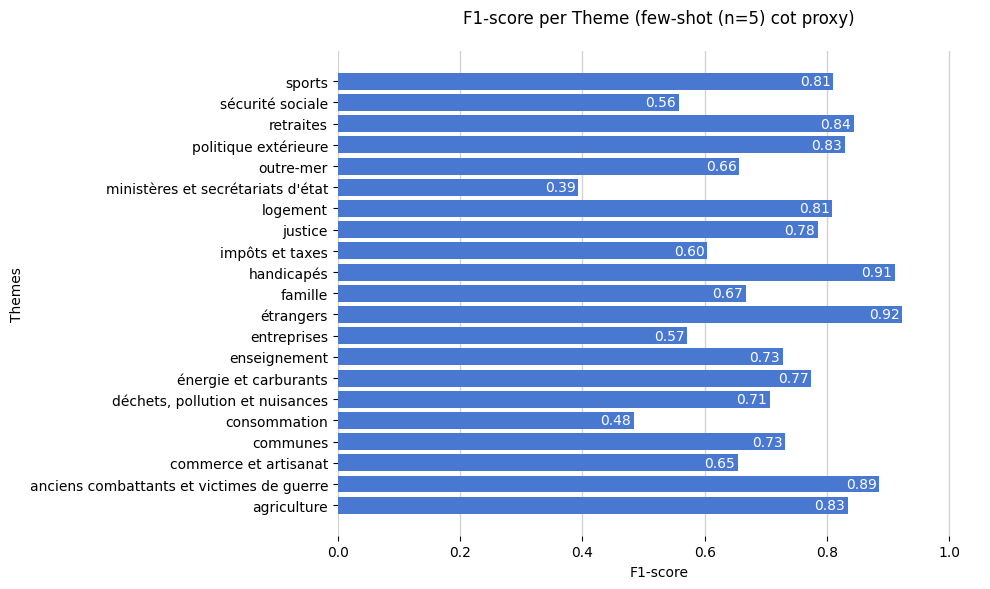

In [24]:
print_prompts(RUN_INFOS[13]["prompts"])
plot_precision(RUN_IDS[13], save_folder=OUTPUT_PATH)
plot_recall(RUN_IDS[13], save_folder=OUTPUT_PATH)
plot_f1_score(RUN_IDS[13], save_folder=OUTPUT_PATH)

(analysis)

## Confidence

(description)


### Zero-Shot Vanilla

100%|█████████████████████████████████████████████████████████████████████████████| 1495/1495 [00:00<00:00, 2501.81it/s]


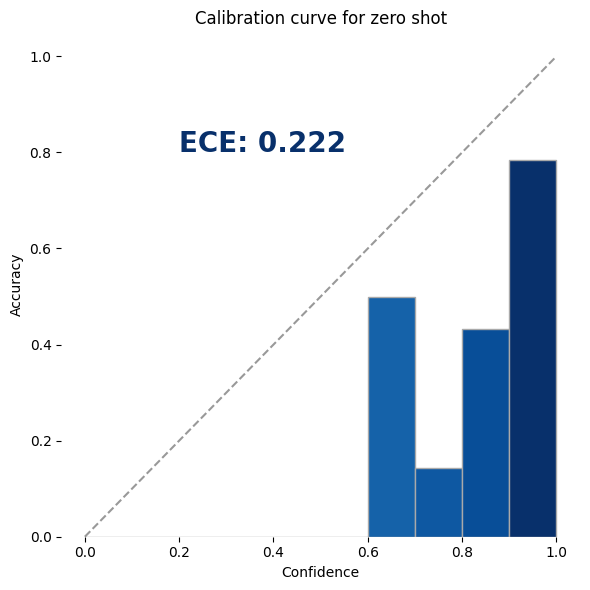

In [19]:
plot_confidence_calibration_curve(RUN_IDS[0], ConfidenceType.Logprobs)

### Zero-Shot Proxy

100%|█████████████████████████████████████████████████████████████████████████████| 1495/1495 [00:00<00:00, 4084.88it/s]


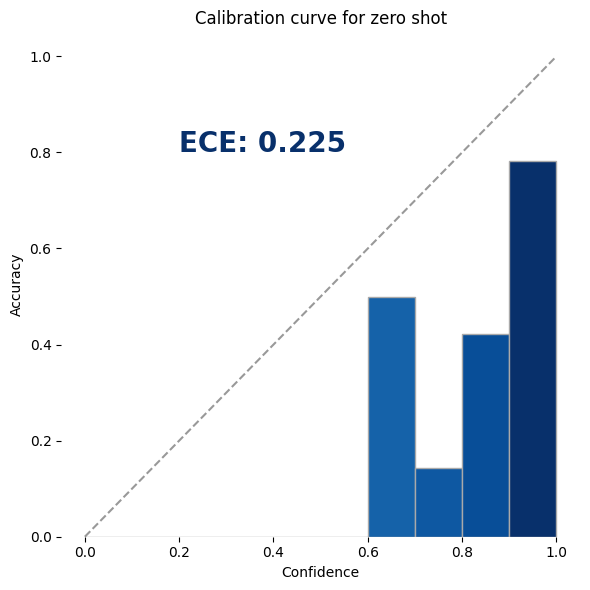

In [20]:
plot_confidence_calibration_curve(RUN_IDS[1], ConfidenceType.Logprobs)

### Zero-Shot CoT Vanilla

100%|█████████████████████████████████████████████████████████████████████████████| 1371/1371 [00:00<00:00, 1915.17it/s]


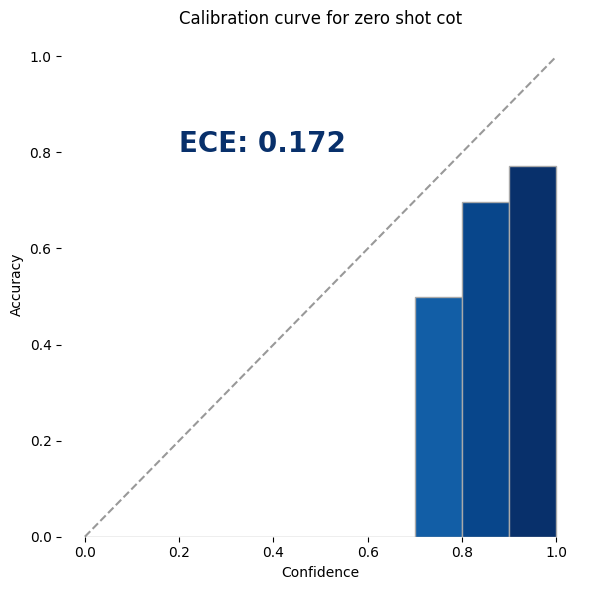

In [21]:
plot_confidence_calibration_curve(RUN_IDS[2], ConfidenceType.Logprobs)

### Zero-Shot CoT Proxy

100%|█████████████████████████████████████████████████████████████████████████████| 1498/1498 [00:01<00:00, 1257.86it/s]


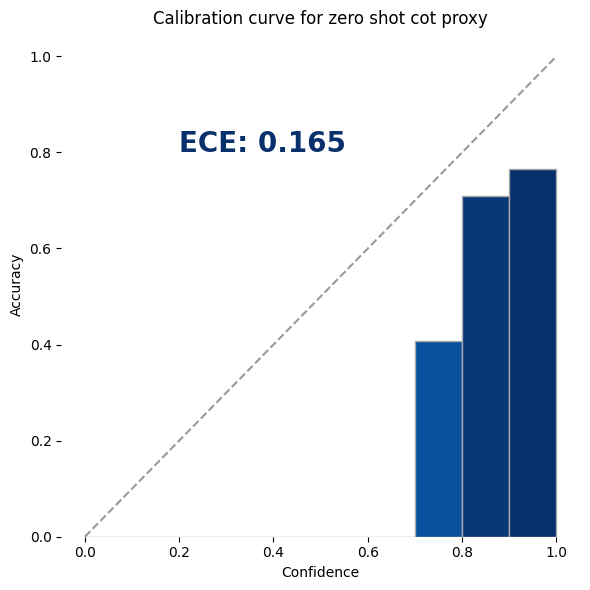

In [23]:
plot_confidence_calibration_curve(RUN_IDS[3], ConfidenceType.Logprobs)

### Zero-Shot Verbalized Confidence

100%|███████████████████████████████████████████████████████████████████████████| 1494/1494 [00:00<00:00, 168276.77it/s]


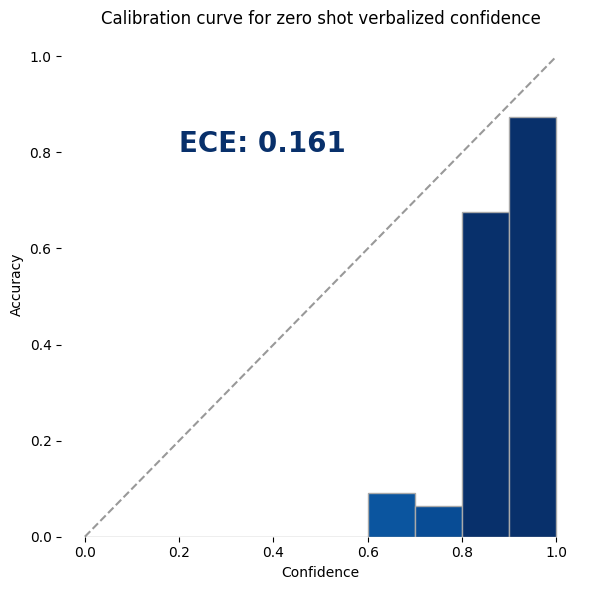

In [27]:
plot_confidence_calibration_curve(RUN_IDS[4], ConfidenceType.Verbalized)

### Zero-Shot CoT Verbalized Confidence

100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [00:05<00:00, 276.19it/s]


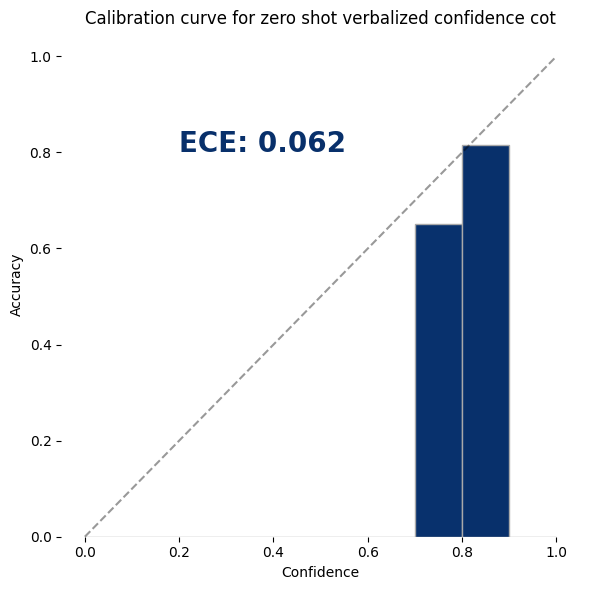

In [28]:
plot_confidence_calibration_curve(RUN_IDS[5], ConfidenceType.Verbalized)

### Zero-Shot Self-Calibration

100%|█████████████████████████████████████████████████████████████████████████████| 1495/1495 [00:01<00:00, 1041.70it/s]


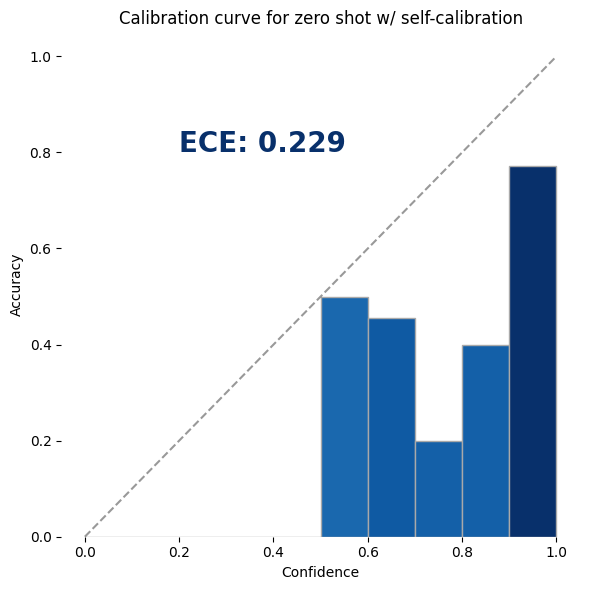

In [29]:
plot_confidence_calibration_curve(RUN_IDS[6], ConfidenceType.SelfCalibration)

### Zero-Shot Cot Self-Calibration

100%|█████████████████████████████████████████████████████████████████████████████| 1346/1346 [00:00<00:00, 2369.41it/s]


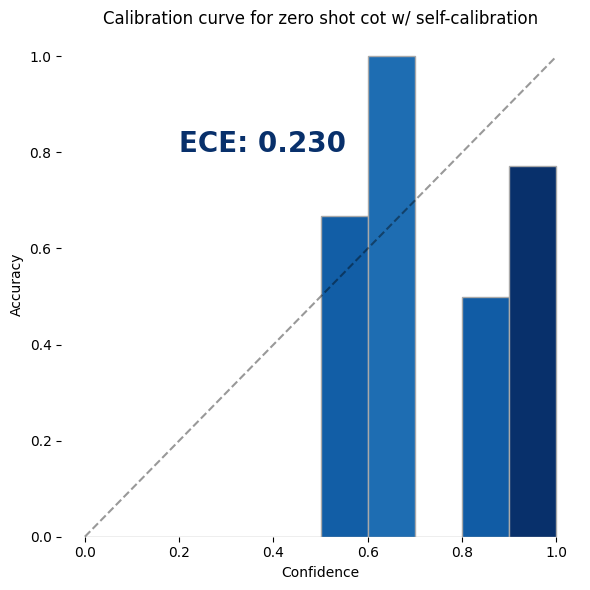

In [32]:
plot_confidence_calibration_curve(RUN_IDS[7], ConfidenceType.SelfCalibration)

### One-Shot Vanilla

100%|█████████████████████████████████████████████████████████████████████████████| 1499/1499 [00:00<00:00, 1834.81it/s]


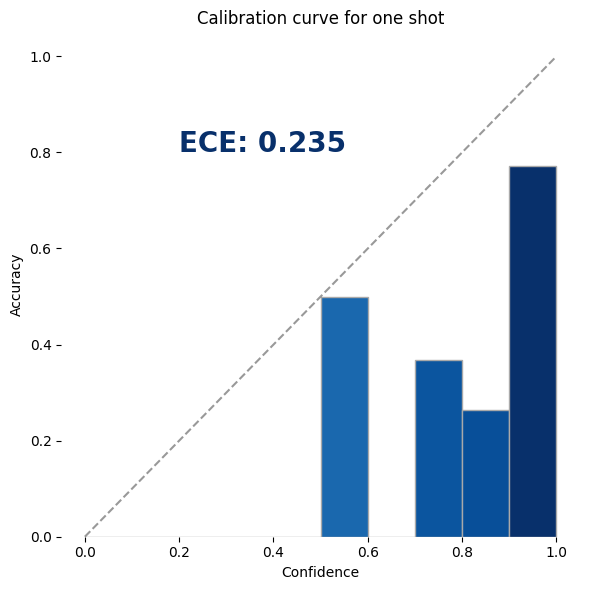

In [31]:
plot_confidence_calibration_curve(RUN_IDS[8], ConfidenceType.Logprobs)

### One-Shot Proxy

100%|█████████████████████████████████████████████████████████████████████████████| 1467/1467 [00:00<00:00, 5663.06it/s]


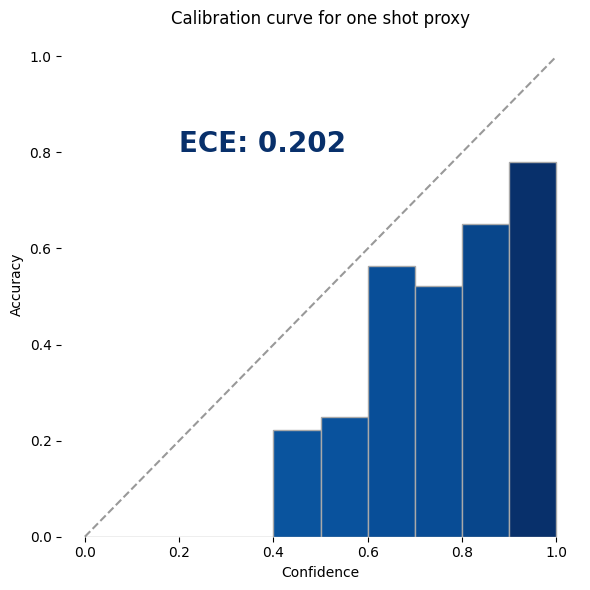

In [33]:
plot_confidence_calibration_curve(RUN_IDS[9], ConfidenceType.Logprobs)

### Few-Shot (k=5) Vanilla

100%|█████████████████████████████████████████████████████████████████████████████| 1495/1495 [00:00<00:00, 2751.53it/s]


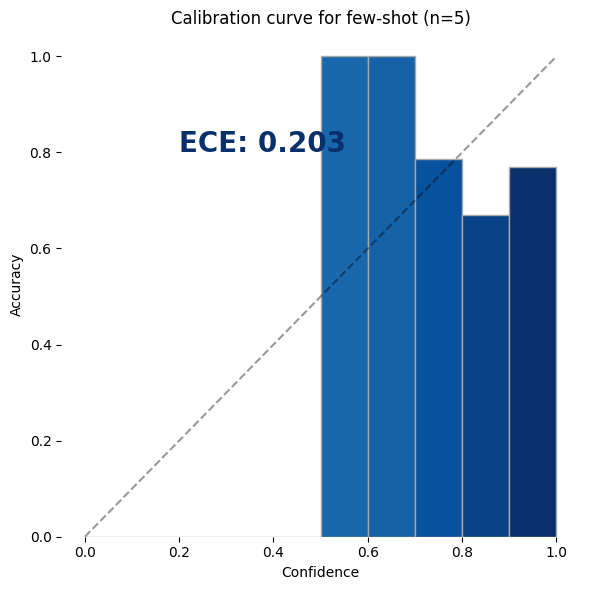

In [34]:
plot_confidence_calibration_curve(RUN_IDS[10], ConfidenceType.Logprobs)

### Few-Shot (k=5) Proxy

100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 1947.29it/s]


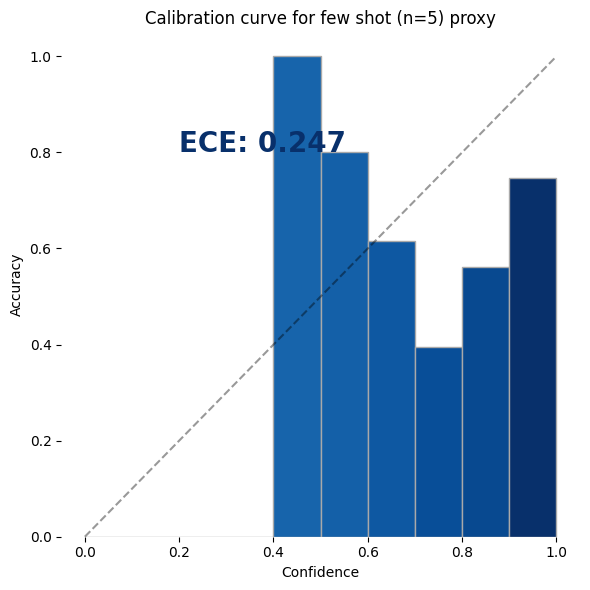

In [36]:
plot_confidence_calibration_curve(RUN_IDS[11], ConfidenceType.Logprobs)

### Few-Shot (k=5) CoT Vanilla

100%|██████████████████████████████████████████████████████████████████████████████| 1491/1491 [00:03<00:00, 420.90it/s]


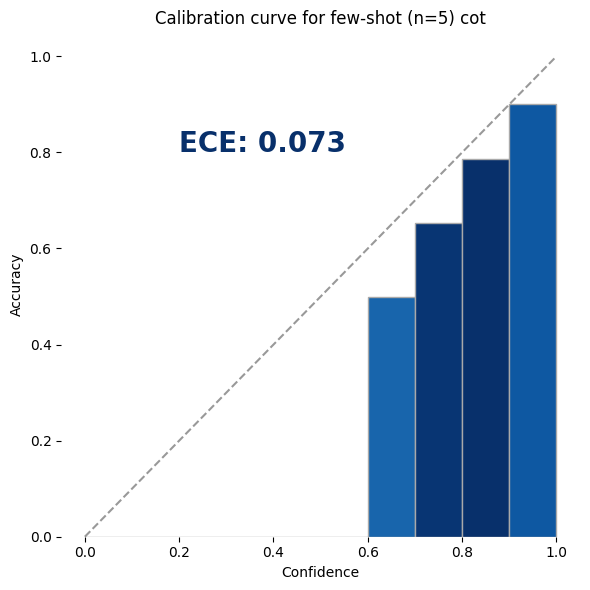

In [38]:
plot_confidence_calibration_curve(RUN_IDS[12], ConfidenceType.Logprobs)

### Few-Shot (k=5) CoT Proxy

100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [00:03<00:00, 497.56it/s]


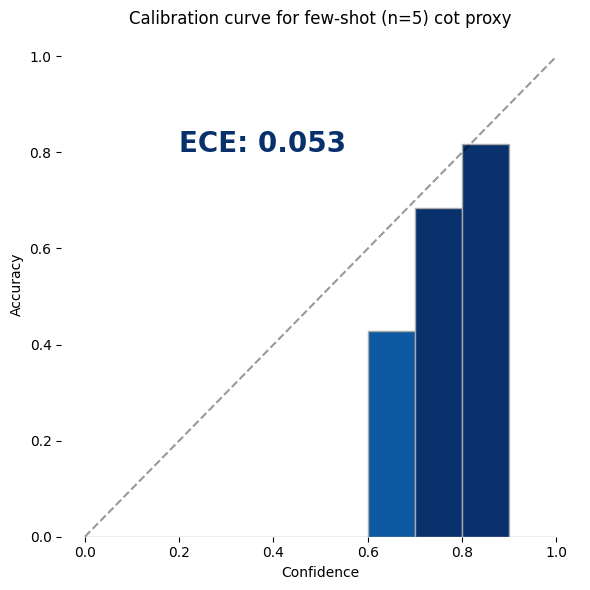

In [39]:
plot_confidence_calibration_curve(RUN_IDS[13], ConfidenceType.Logprobs)

## Summary

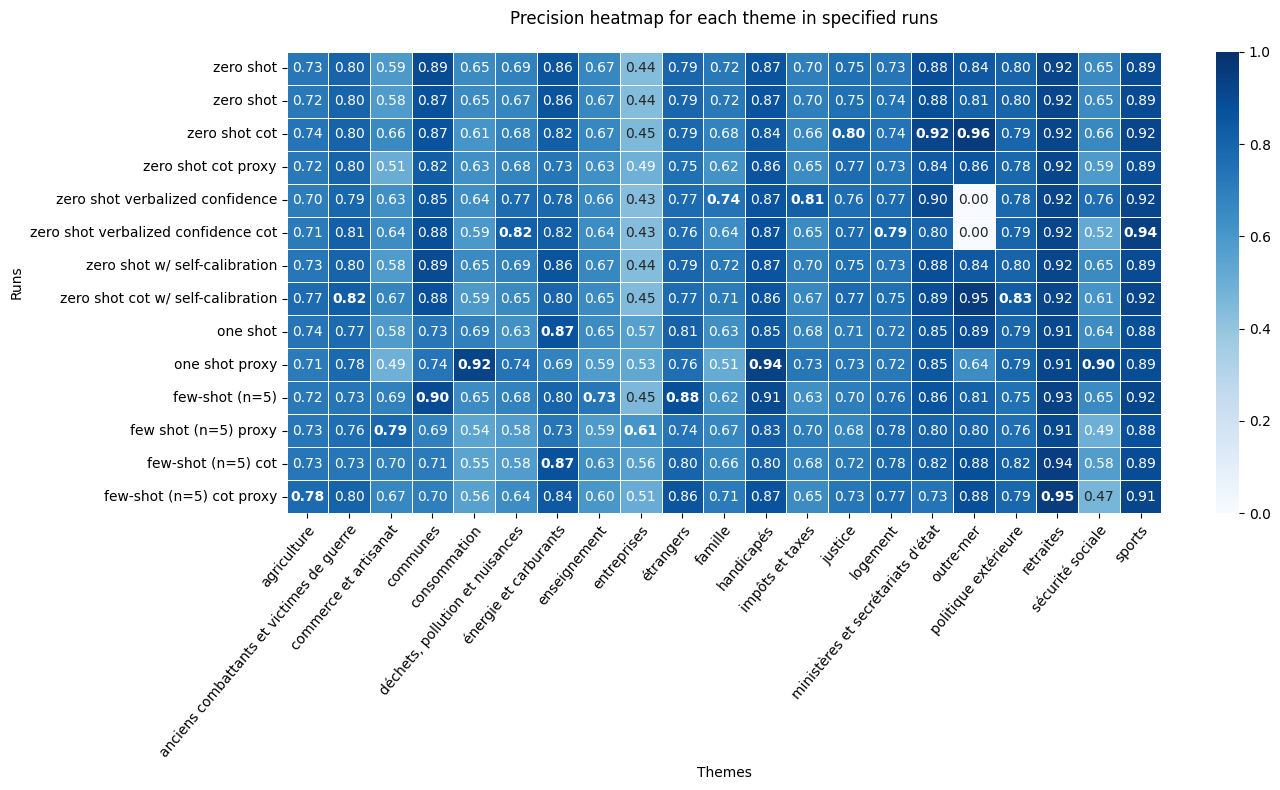

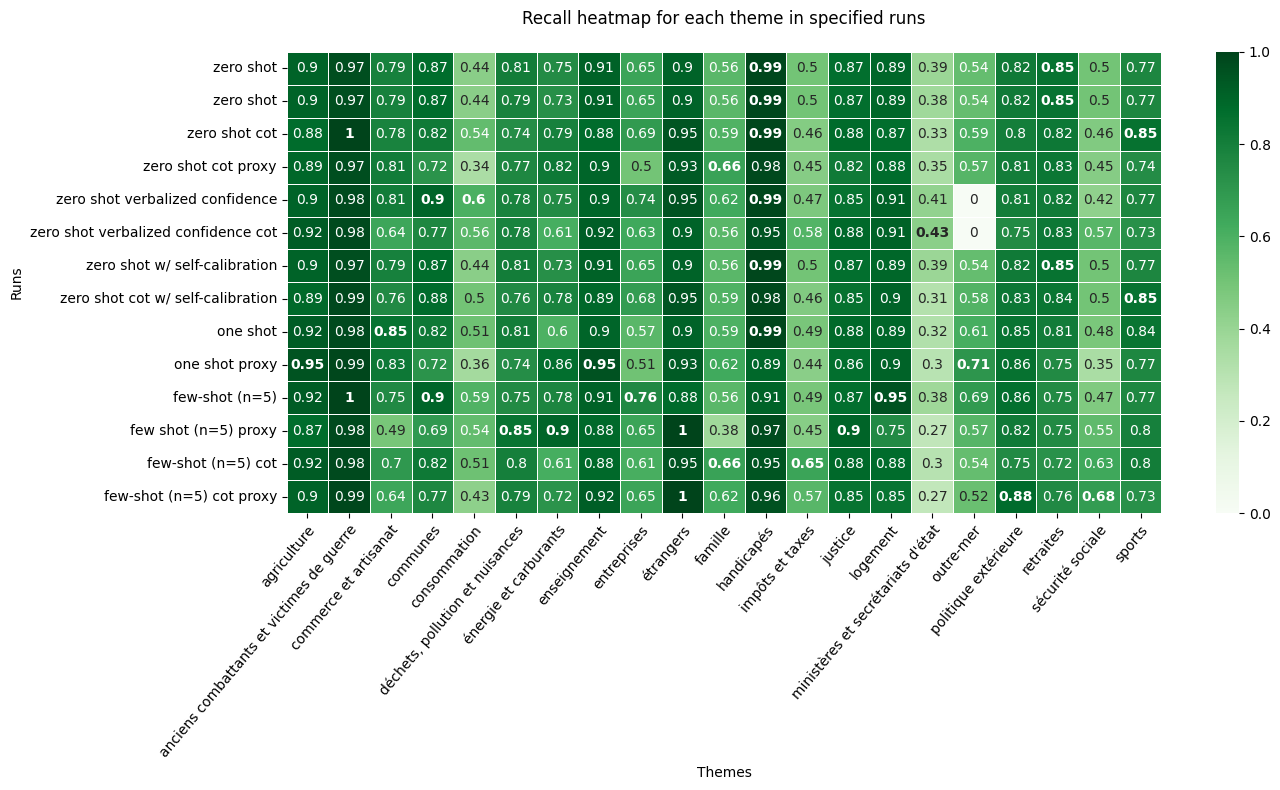

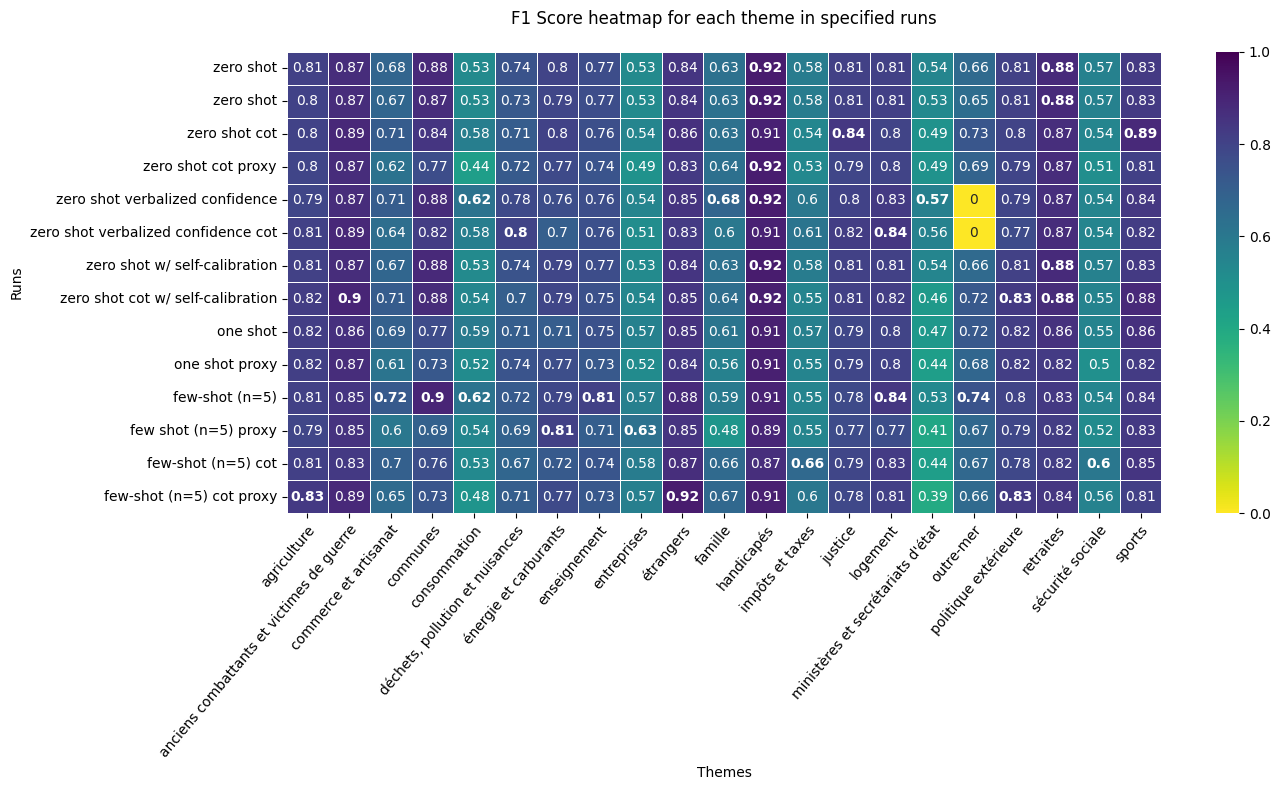

In [40]:
plot_precision_heatmap(RUN_IDS)
plot_recall_heatmap(RUN_IDS)
plot_f1_score_heatmap(RUN_IDS)

In [41]:
plot_average_precision(RUN_IDS)
plot_average_recall(RUN_IDS)
plot_average_f1_score(RUN_IDS)

NameError: name 'plot_average_precision' is not defined

## Qualitative analysis

In [ ]:
ra = ResultsAnalyzer(RUN_IDS[0])

## Statistical tests

(description)


In [ ]:
# plot_stats(RUN_IDS)